In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    './data/household_power_consumption.txt',
    sep=';',
    na_values=['nan', '?']
)
df.index = pd.to_datetime(df['Date'] +' '+ df['Time'], dayfirst=True)
df.index.name = 'dt'
df = df.drop(columns = ['Date', 'Time'])

In [3]:
df

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
...                             ...  
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0  

[2075259 rows x 7 columns]

In [4]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
start_date = pd.Timestamp('2006-12-01')
end_date = pd.Timestamp('2009-11-30')

newdf = df.loc[start_date:end_date]

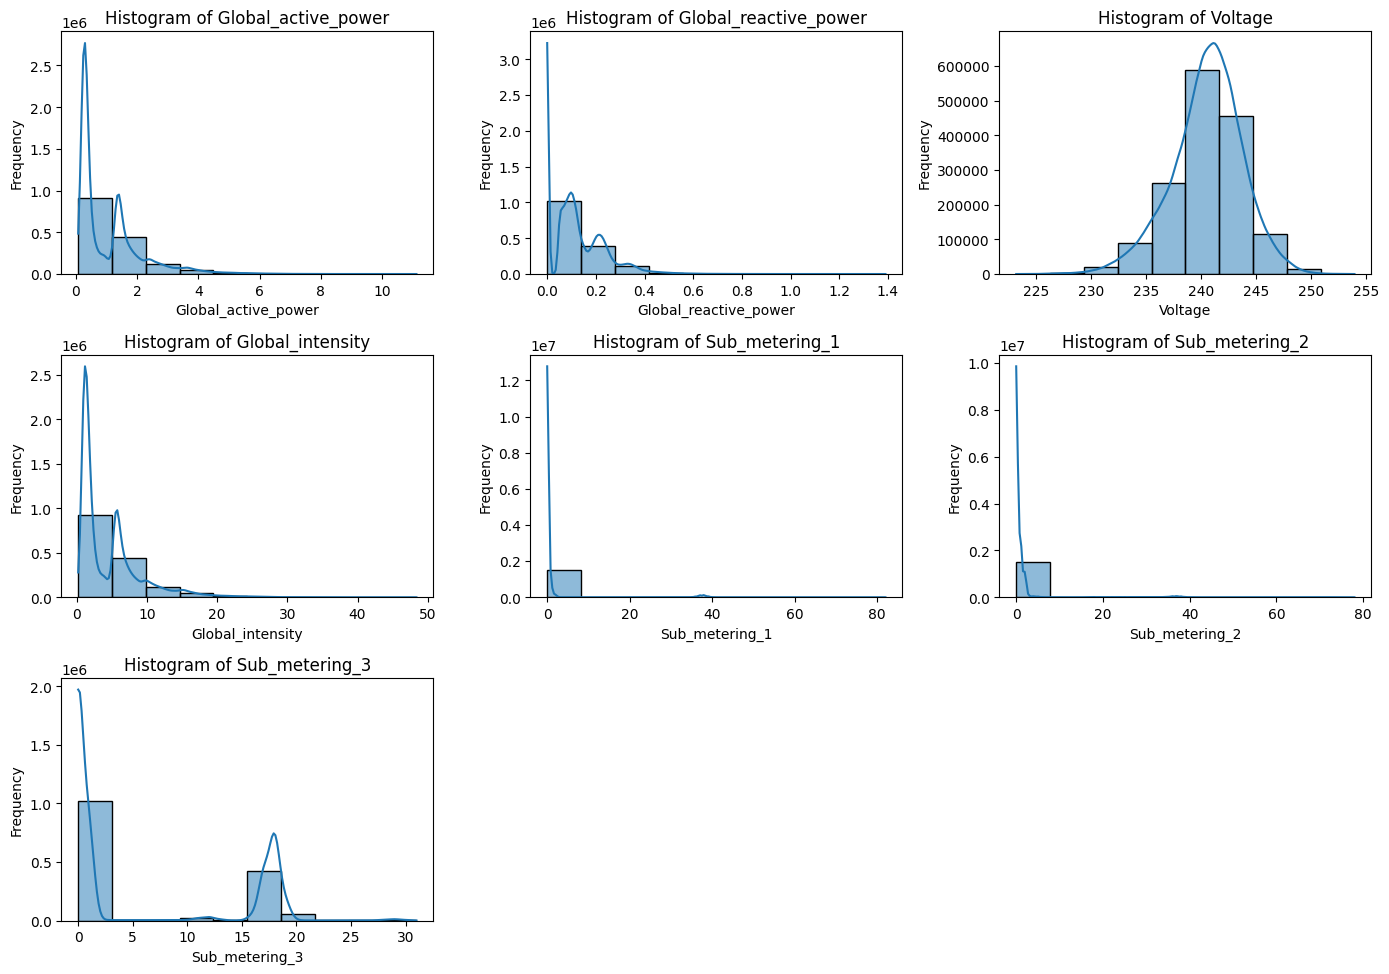

In [11]:
plt.figure(figsize=(14, 10))

# Histograms for each column
for i, column in enumerate(newdf.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(newdf[column], kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

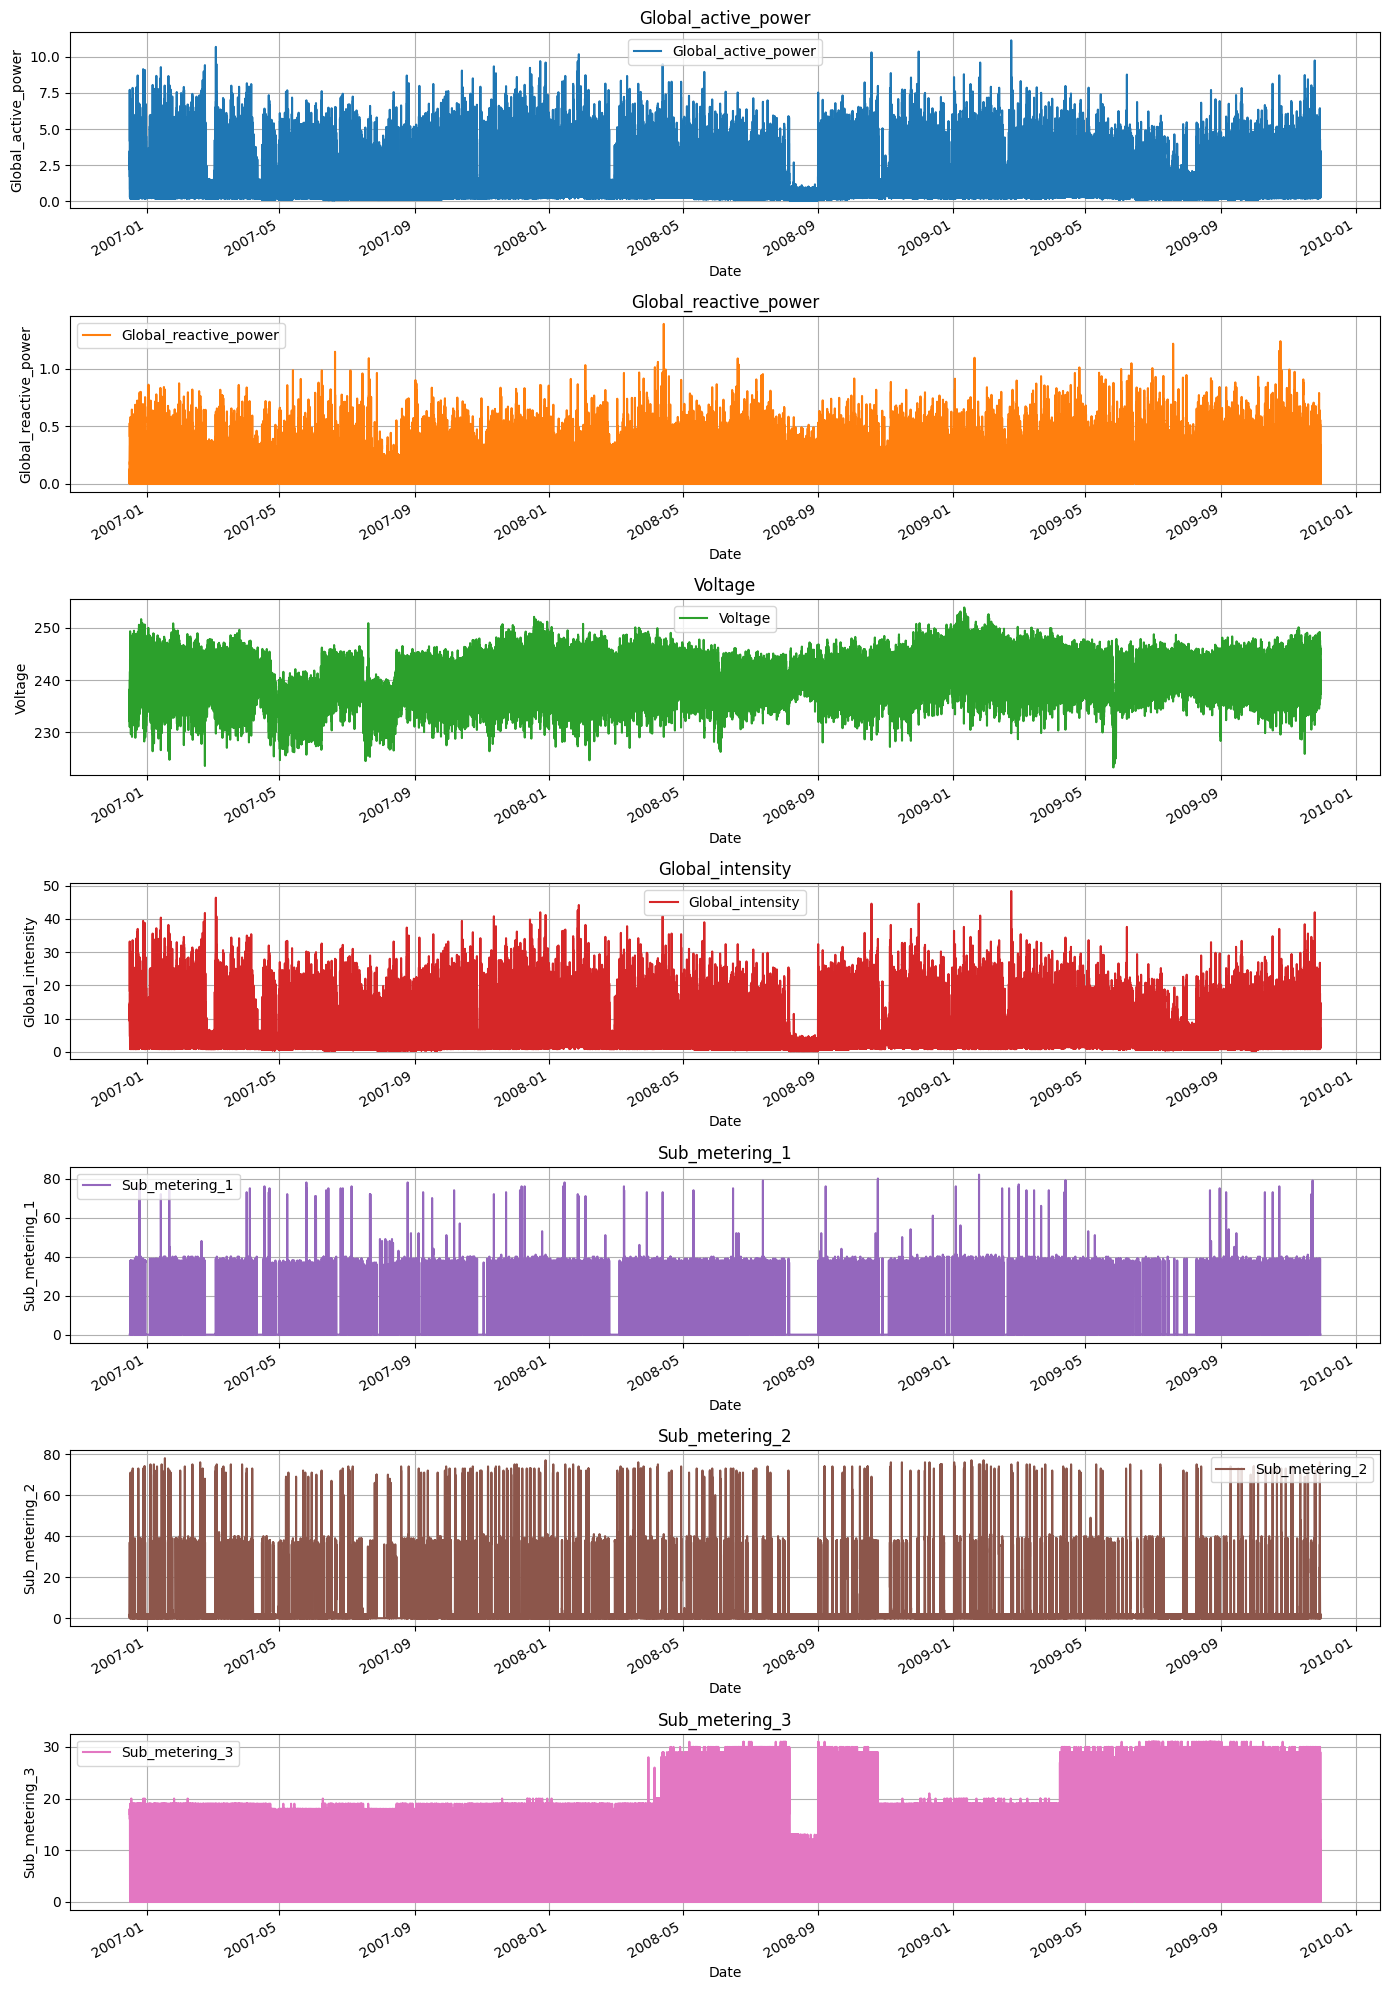

In [21]:
plt.figure(figsize=(14, 20))

# Time Series for each column
for i, column in enumerate(newdf.columns, 1):
    plt.subplot(7, 1, i)
    newdf[column].plot(title=column, xlabel='Date', ylabel=column, legend=True)
    plt.grid(True)

plt.tight_layout()
plt.show()

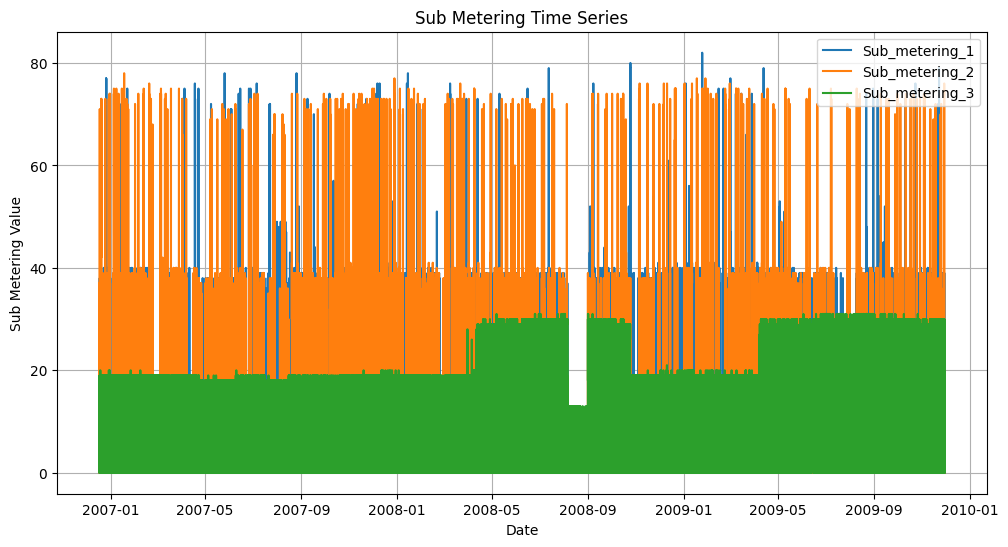

In [35]:
# Melt DataFrame
df_melted = newdf.reset_index().melt(id_vars='dt', value_vars=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='dt', y='value', hue='variable')
plt.title('Sub Metering Time Series')
plt.xlabel('Date')
plt.ylabel('Sub Metering Value')
plt.legend(loc='upper right') 
plt.grid(True)
plt.show()

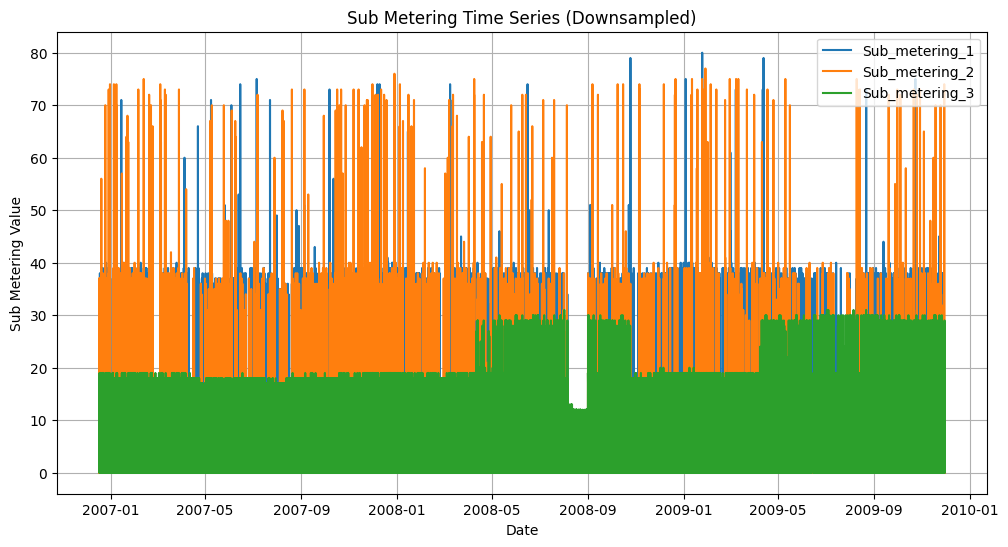

In [40]:
df_downsampled = newdf.iloc[::20]
plt.figure(figsize=(12, 6))

for column in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    plt.plot(df_downsampled.index, df_downsampled[column], label=column)

plt.title('Sub Metering Time Series (Downsampled)')
plt.xlabel('Date')
plt.ylabel('Sub Metering Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

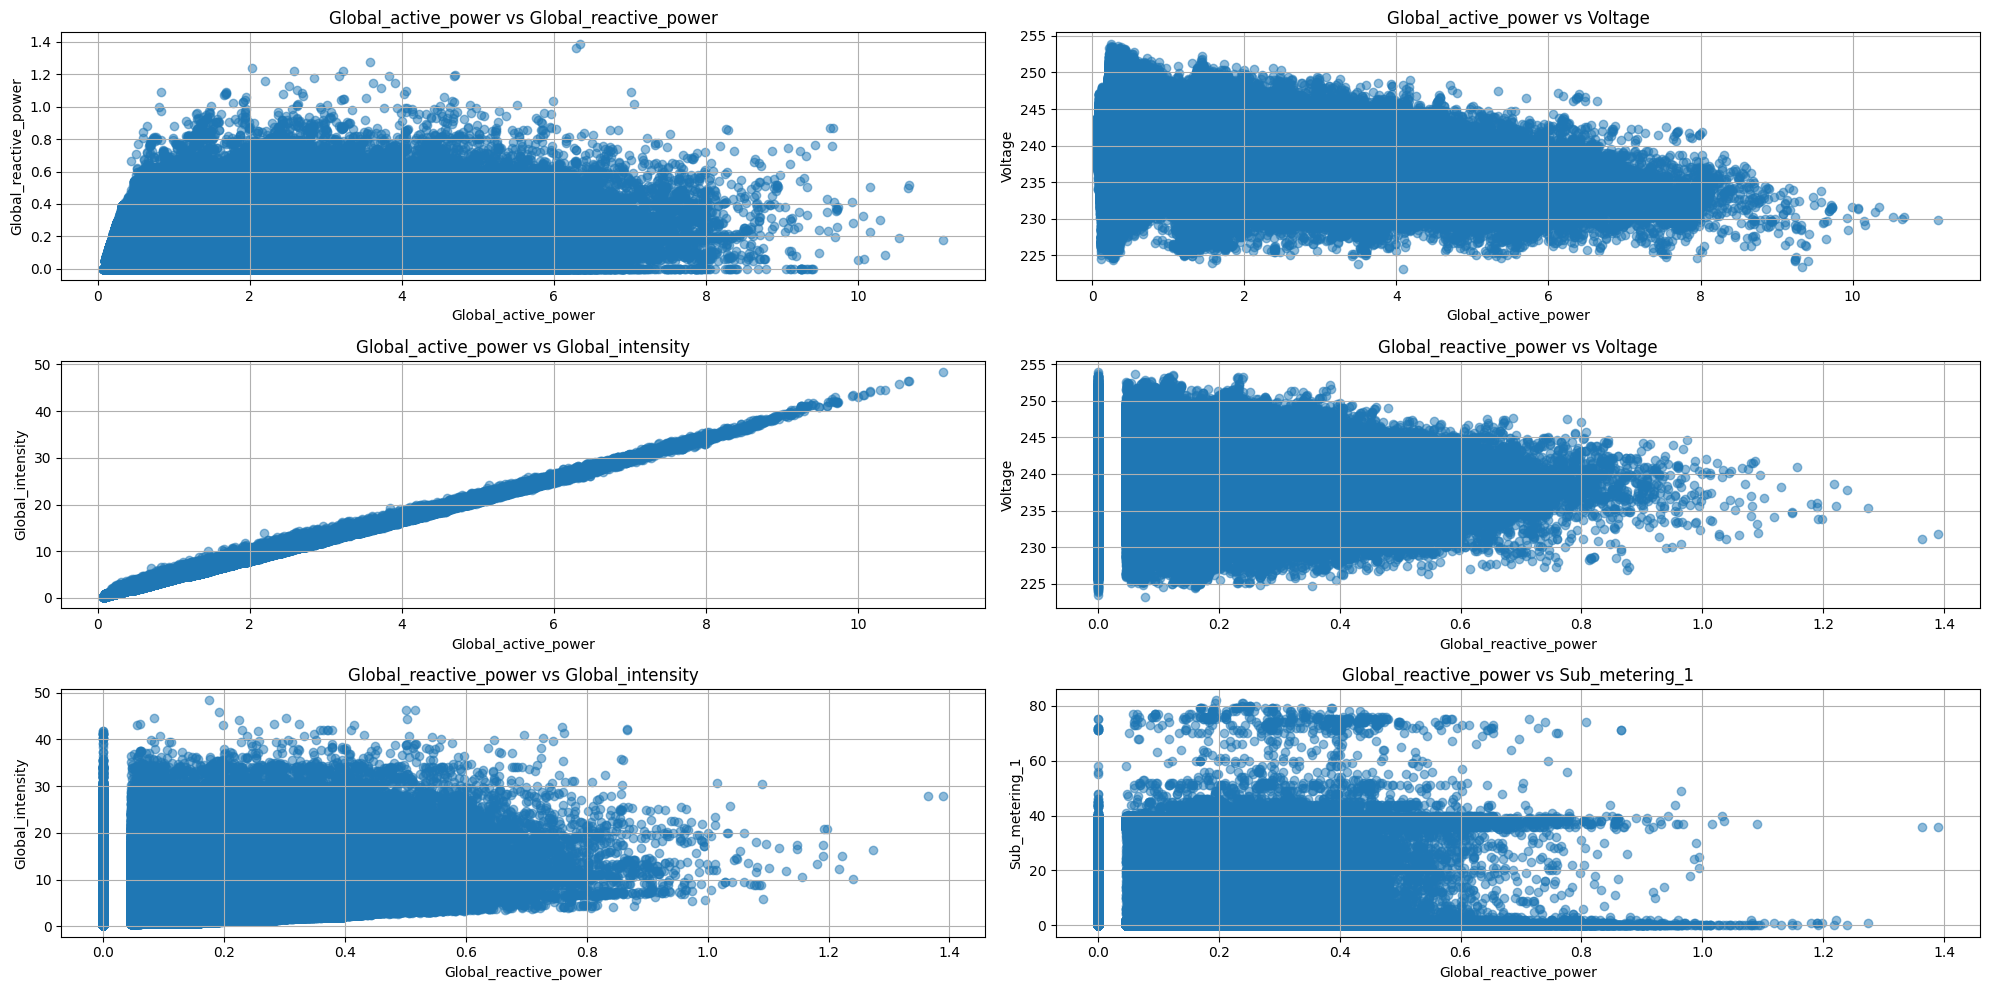

In [75]:
import matplotlib.pyplot as plt

pairs = [
    ('Global_active_power', 'Global_reactive_power'),
    ('Global_active_power', 'Voltage'),
    ('Global_active_power', 'Global_intensity'),
    ('Global_reactive_power', 'Voltage'),
    ('Global_reactive_power', 'Global_intensity'),
    ('Global_reactive_power', 'Sub_metering_1'),
]

nrows, ncols = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))
axes = axes.flatten()

for ax, (x_col, y_col) in zip(axes, pairs):
    ax.scatter(newdf[x_col], newdf[y_col], marker='o', alpha=0.5)
    ax.set_title(f'{x_col} vs {y_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

plt.tight_layout()
plt.show()

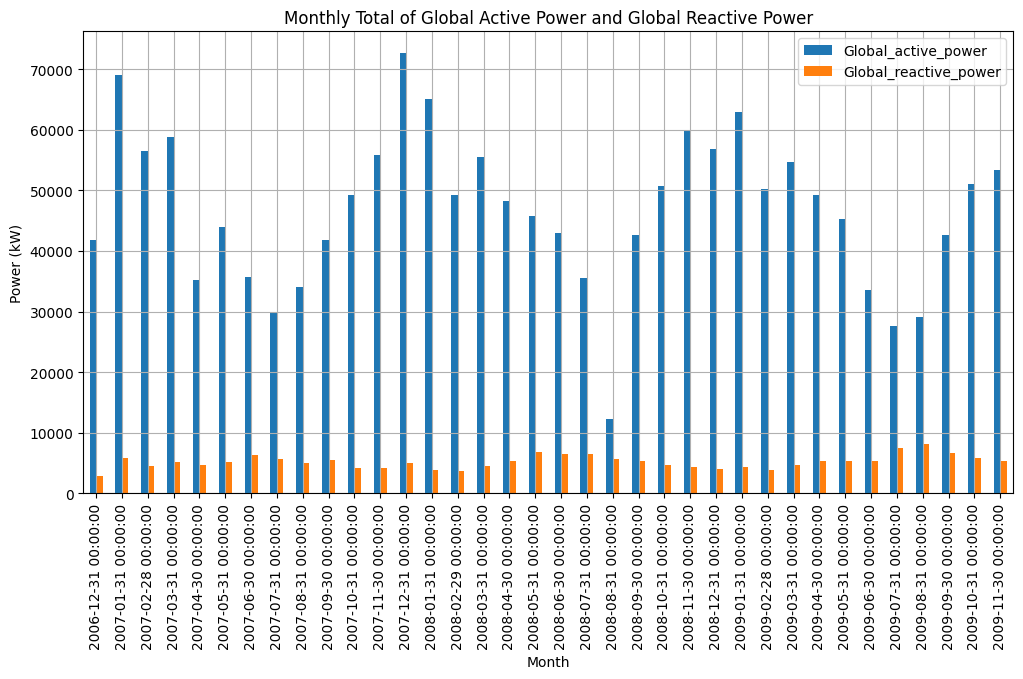

In [77]:
monthly_data = newdf.resample('ME').sum()
monthly_data[['Global_active_power', 'Global_reactive_power']].plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Total of Global Active Power and Global Reactive Power')
plt.xlabel('Month')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.show()

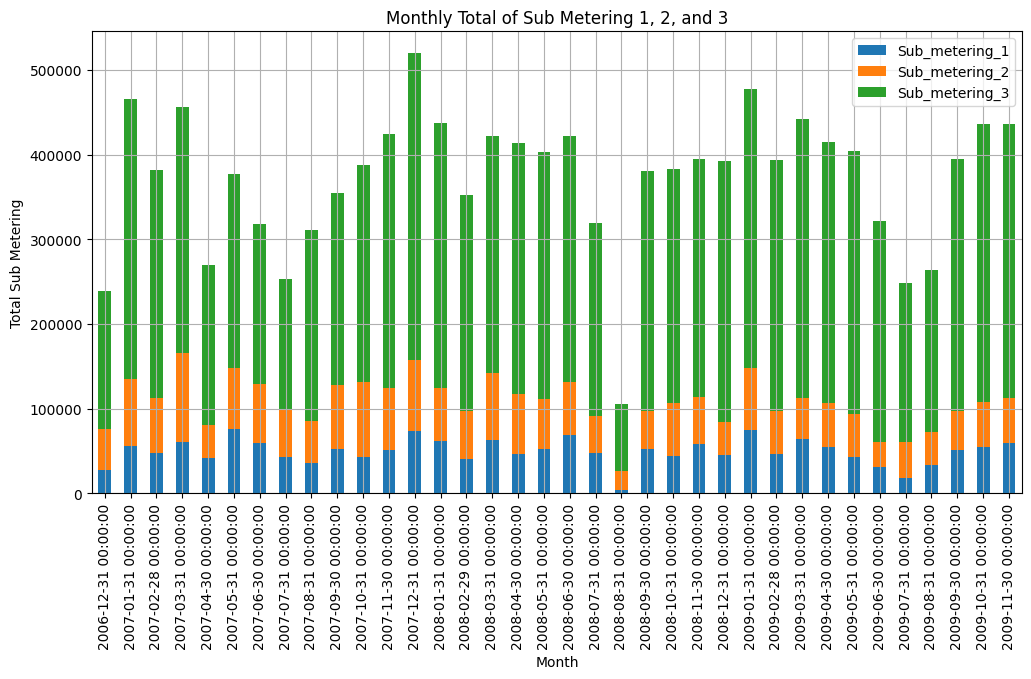

In [79]:
monthly_sub_metering = newdf[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('ME').sum()
monthly_sub_metering.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Total of Sub Metering 1, 2, and 3')
plt.xlabel('Month')
plt.ylabel('Total Sub Metering')
plt.grid(True)
plt.show()

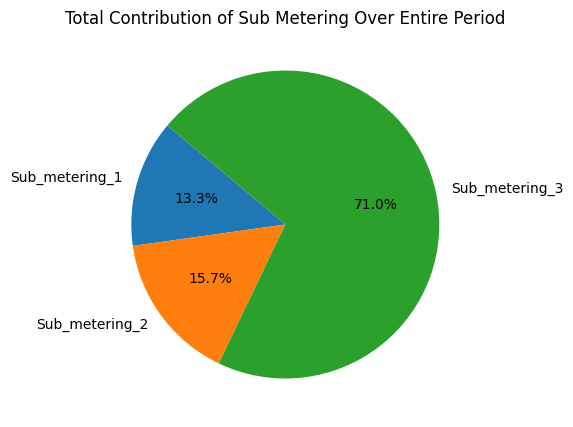

In [107]:
total_sub_metering = monthly_sub_metering.sum()
plt.figure(figsize=(5, 5))
plt.pie(total_sub_metering, labels=total_sub_metering.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Contribution of Sub Metering Over Entire Period')
plt.show()


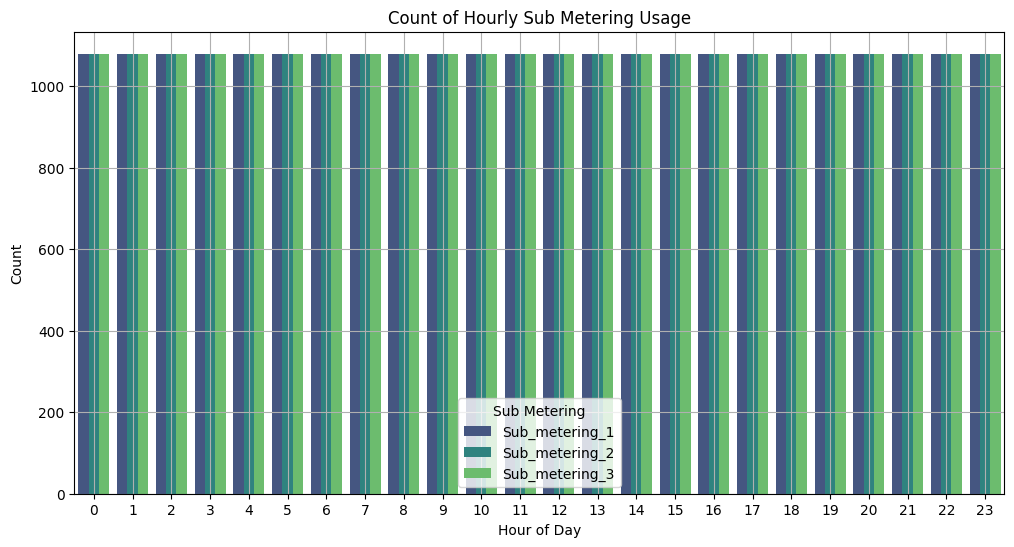

In [117]:
hourly_data = newdf[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('h').sum()
hourly_data['Hour'] = hourly_data.index.hour
hourly_data_melted = hourly_data.melt(id_vars='Hour', var_name='Sub_metering', value_name='Total')

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=hourly_data_melted, hue='Sub_metering', palette='viridis')
plt.title('Count of Hourly Sub Metering Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Sub Metering')
plt.grid(True)
plt.show()


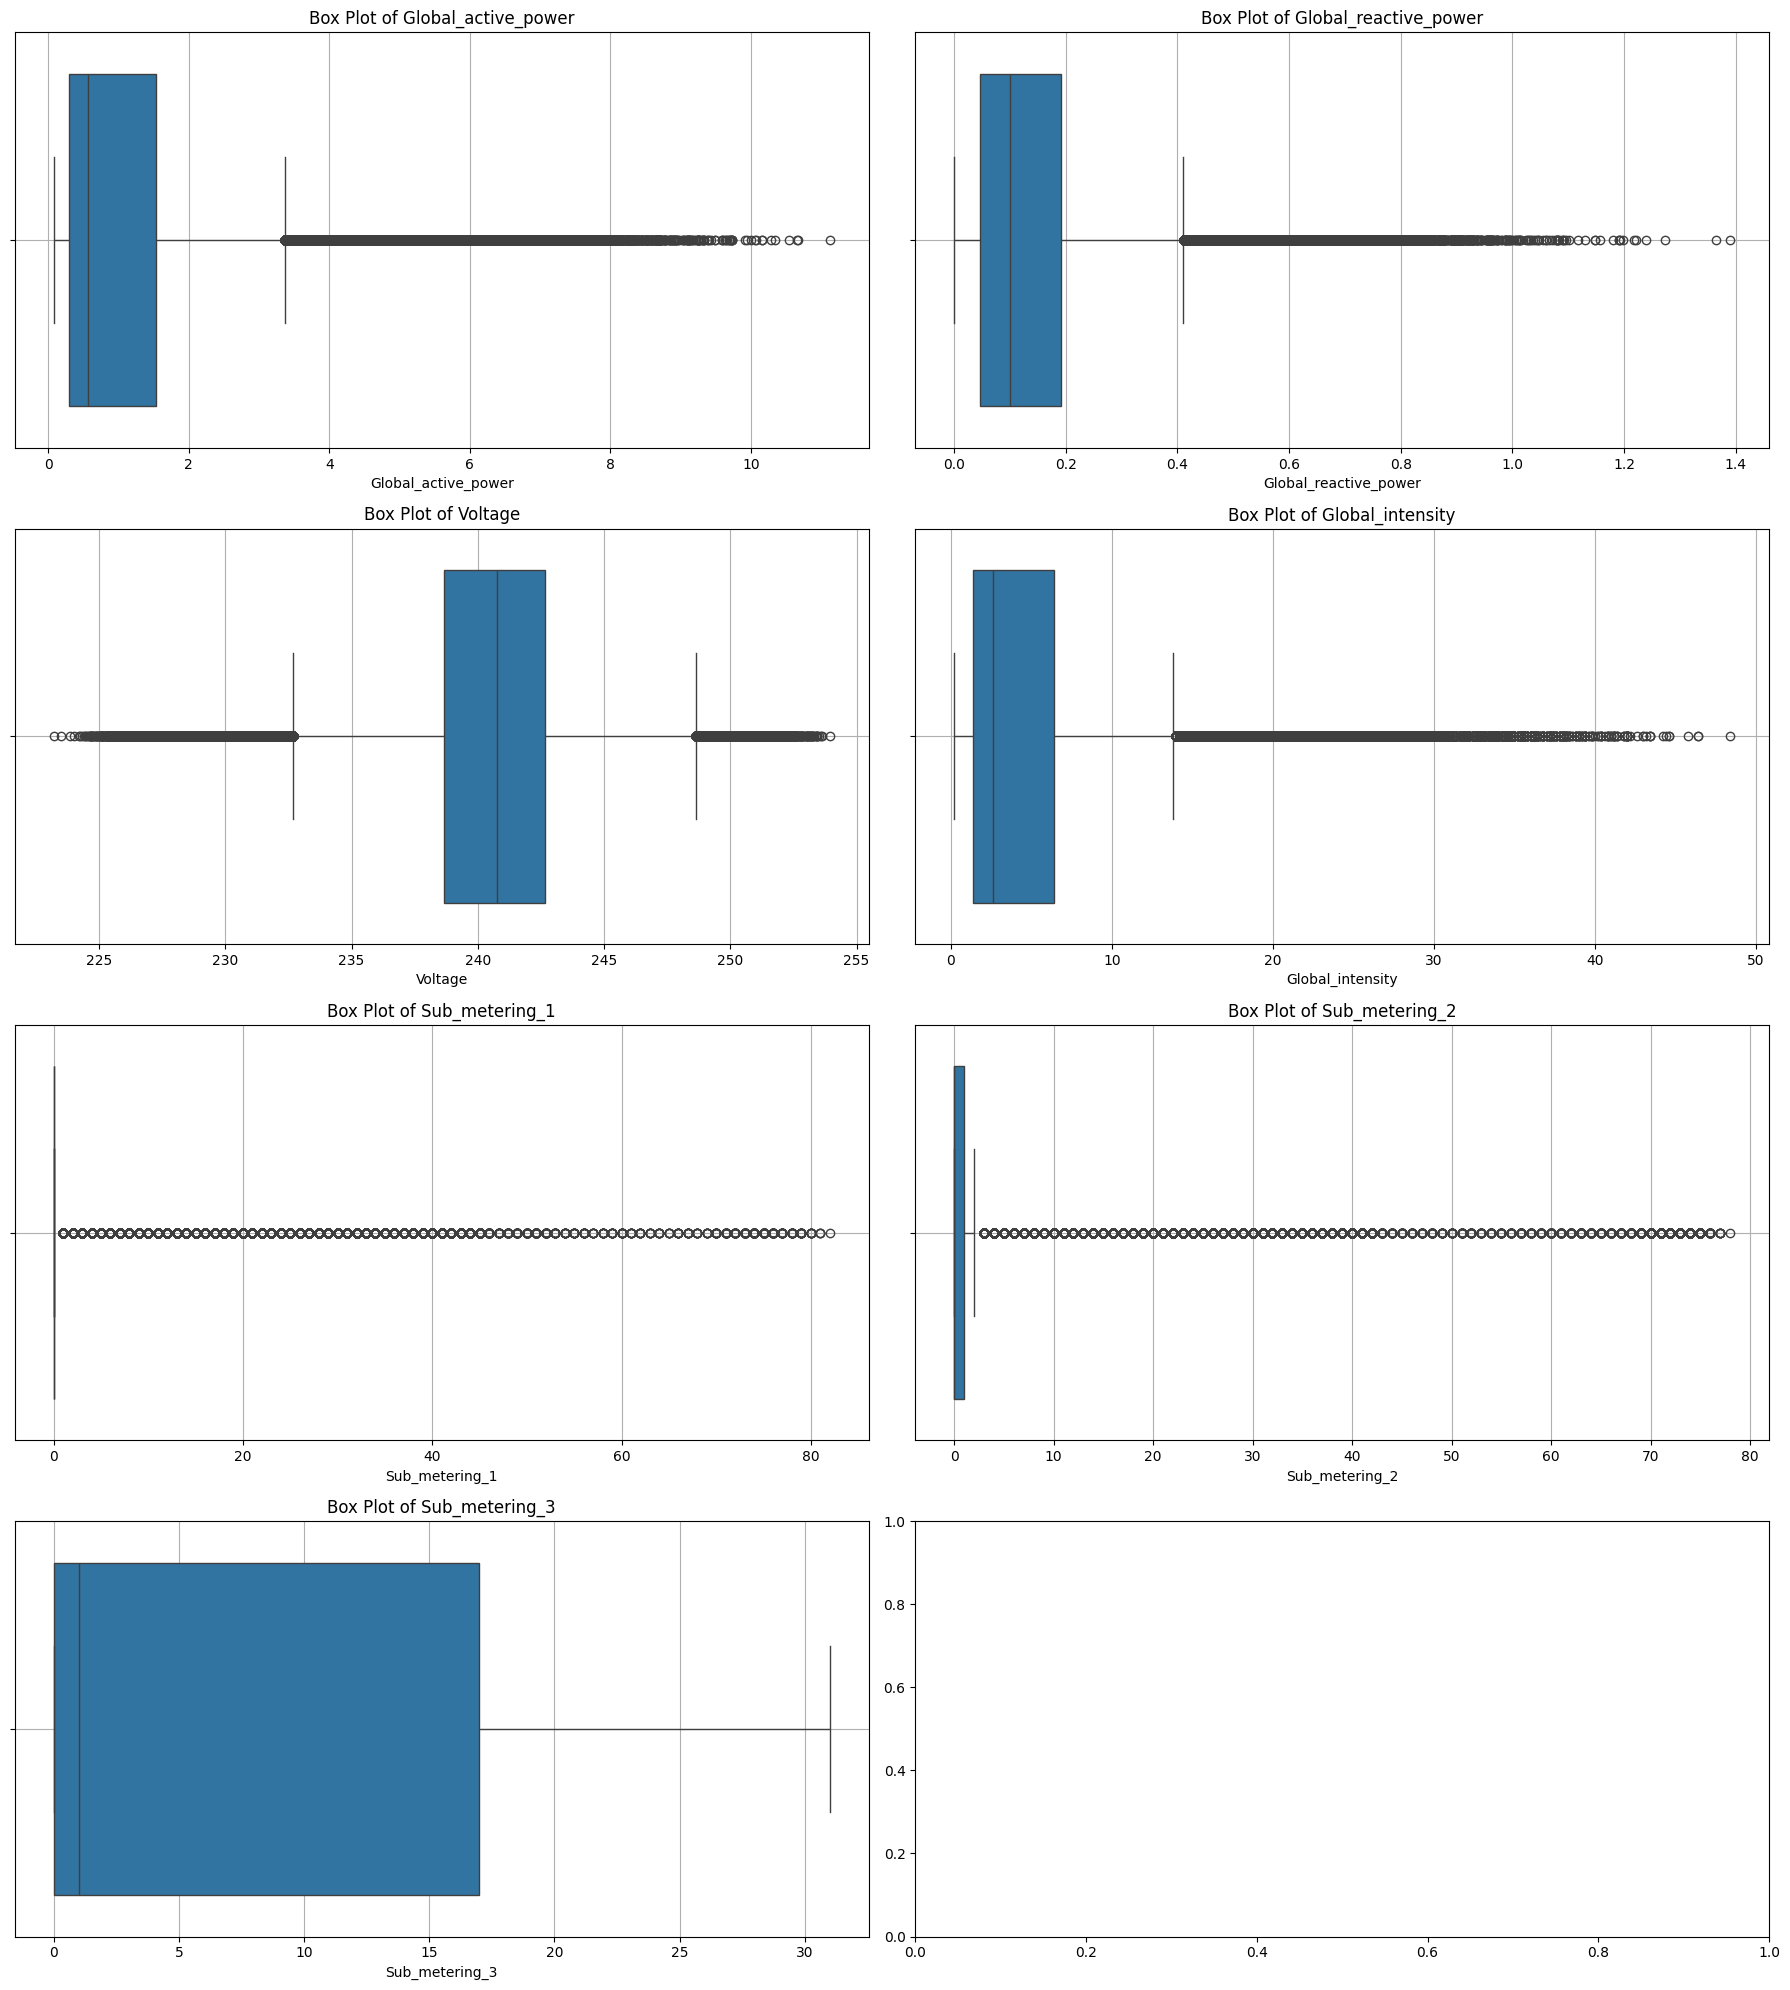

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=newdf[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

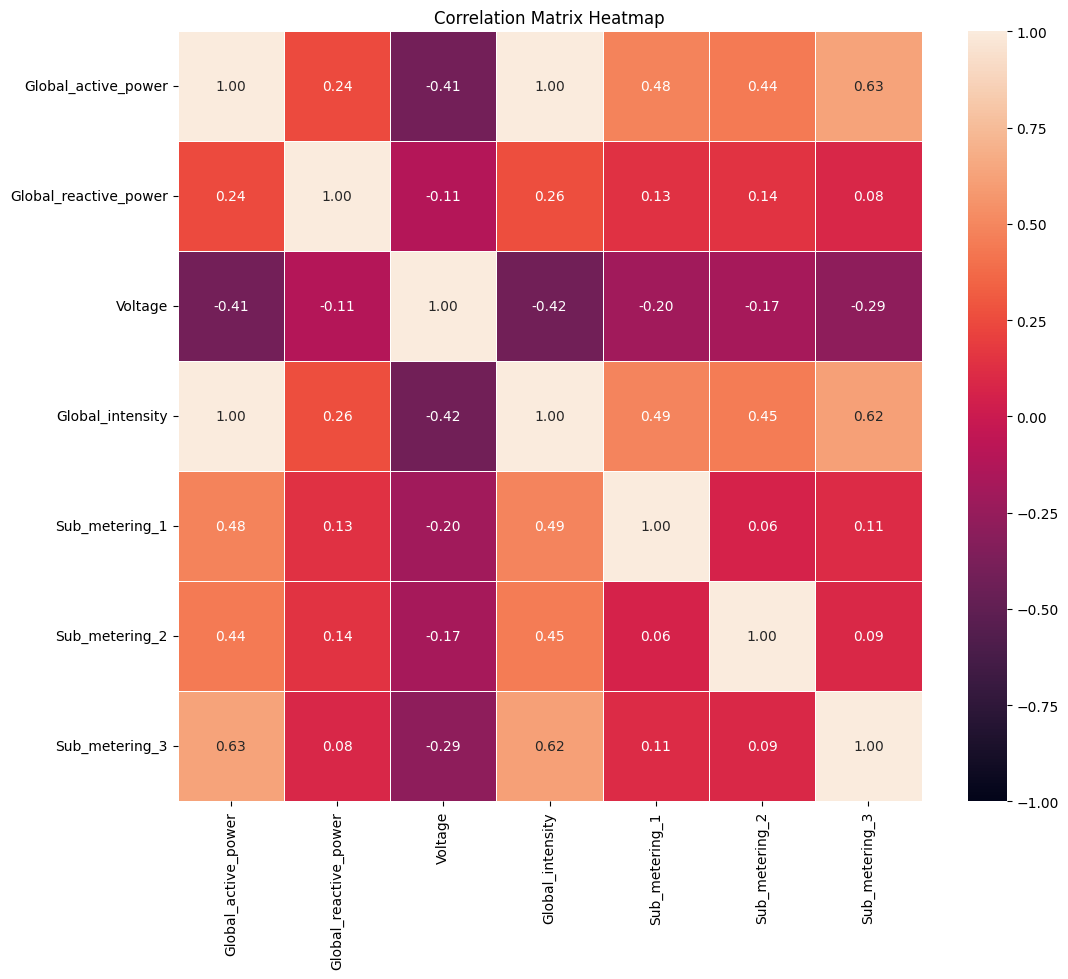

In [125]:
correlation_matrix = newdf.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


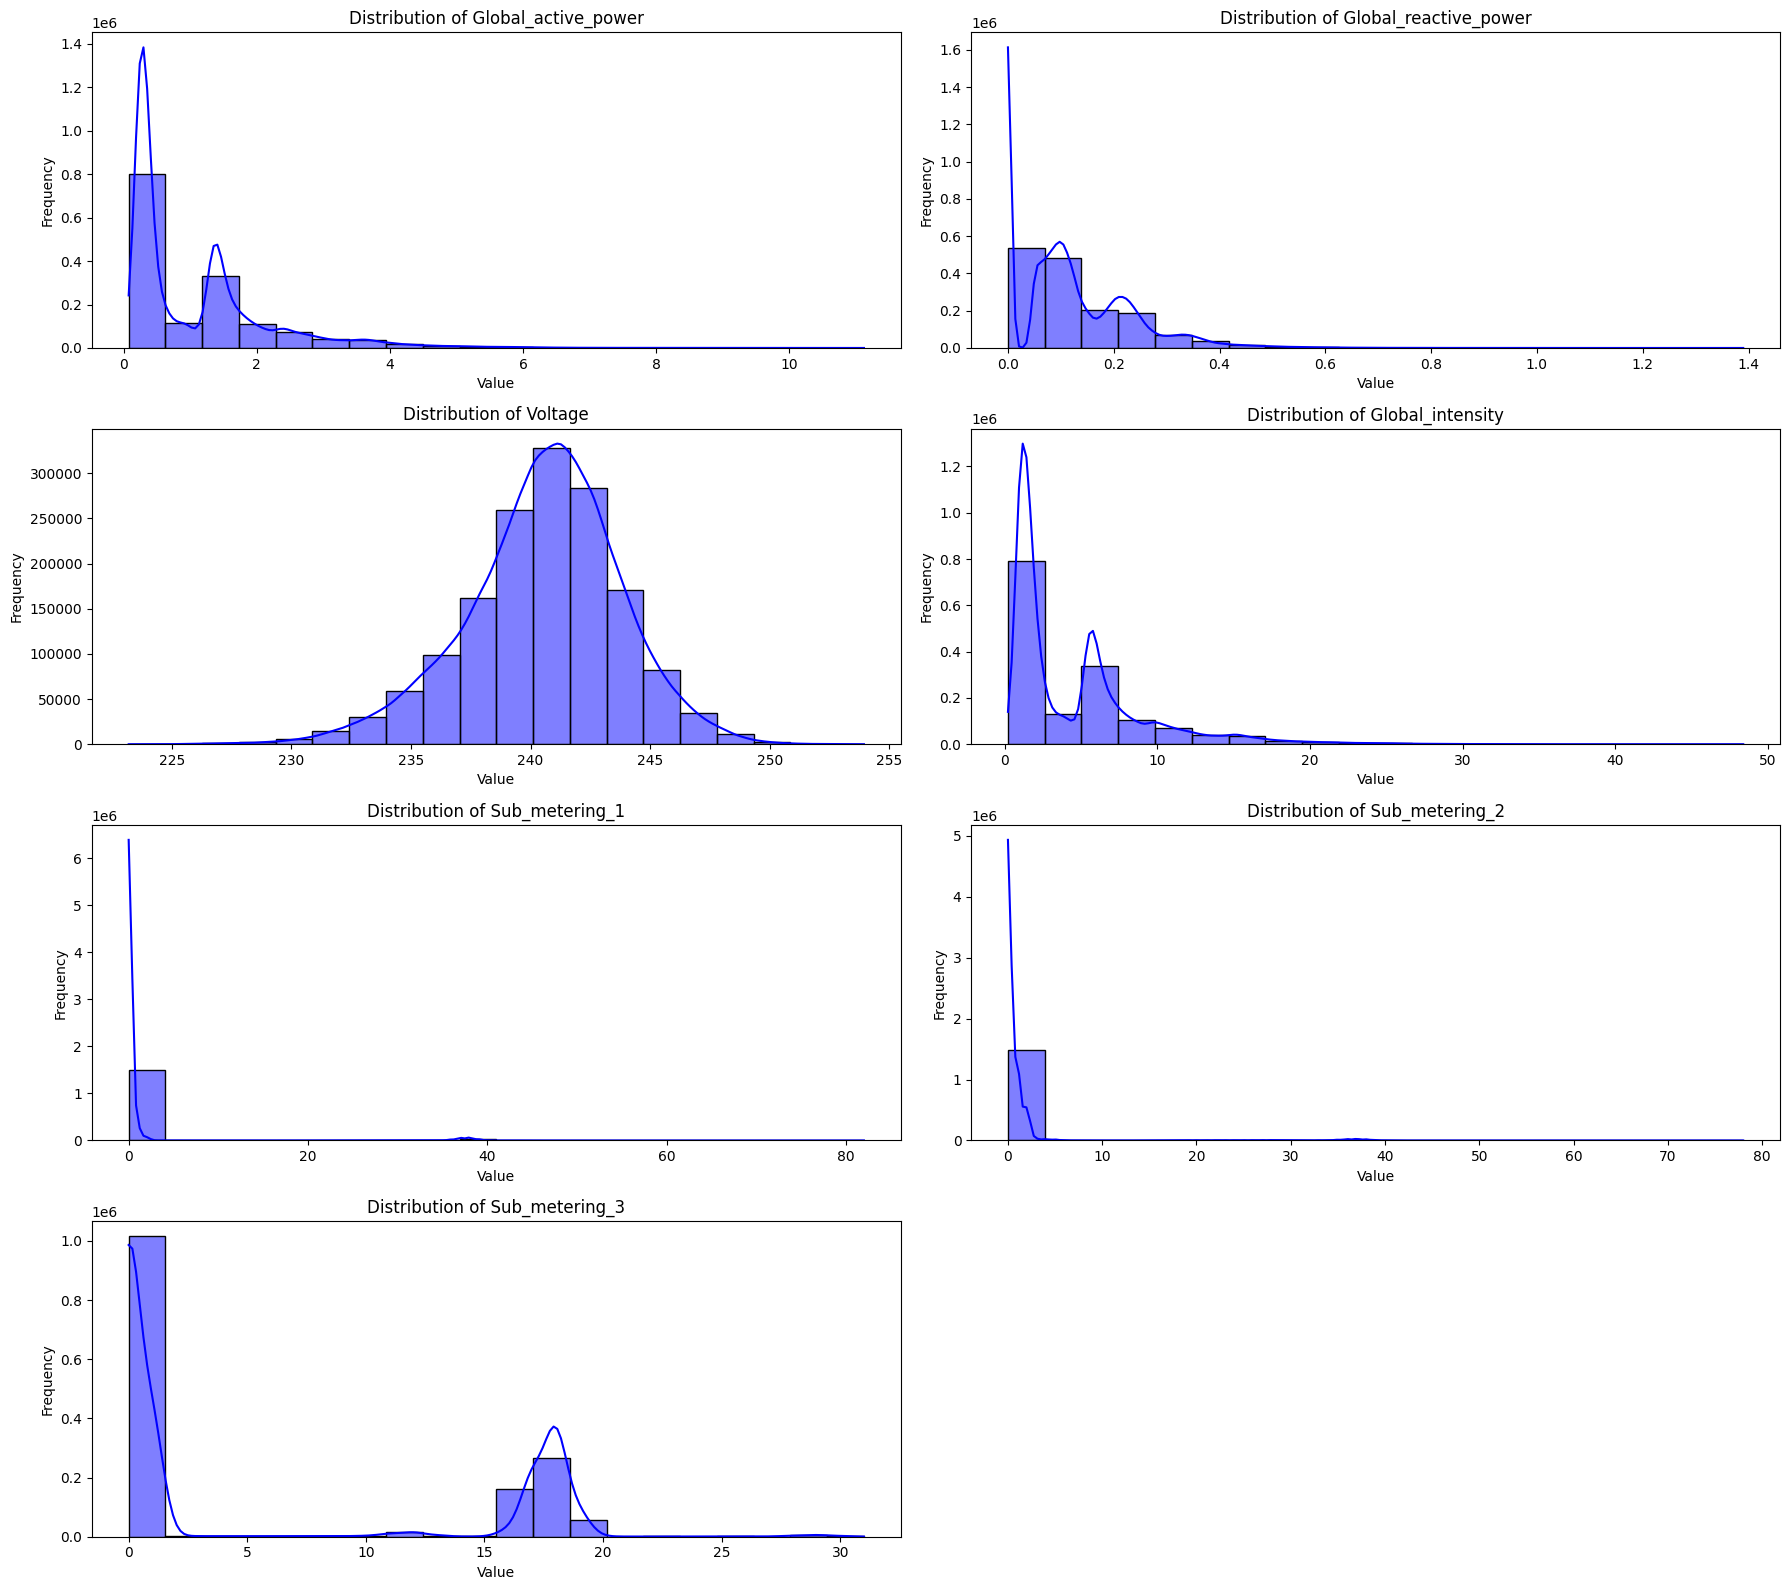

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
plt.figure(figsize=(18, 16))

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.histplot(newdf[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

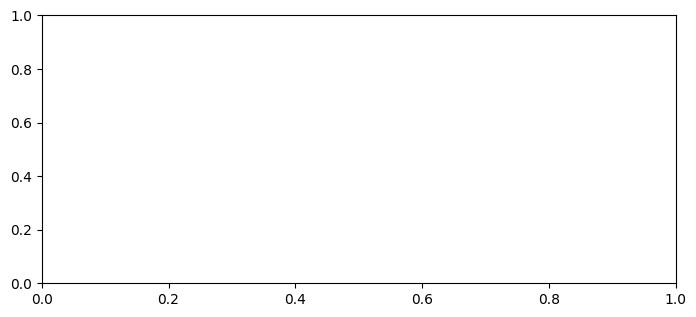

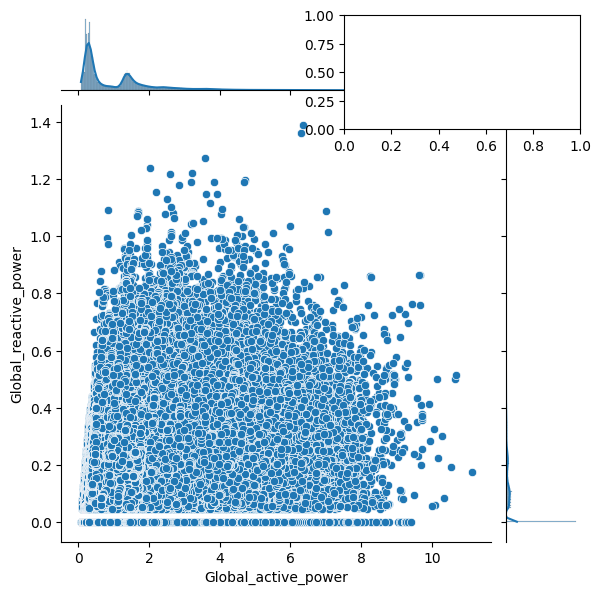

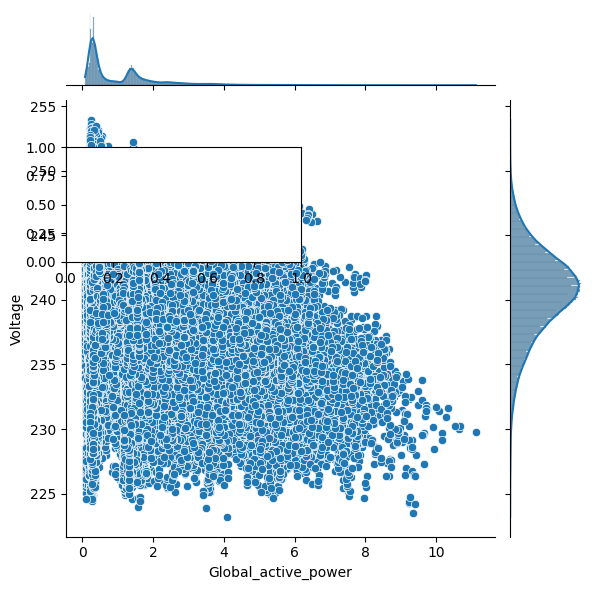

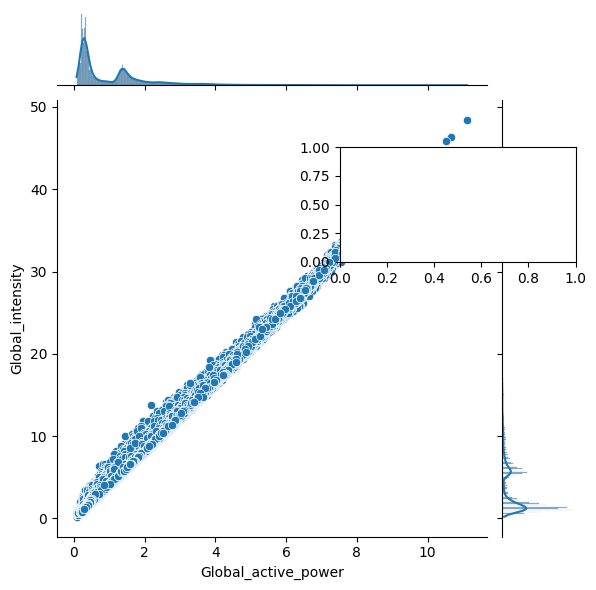

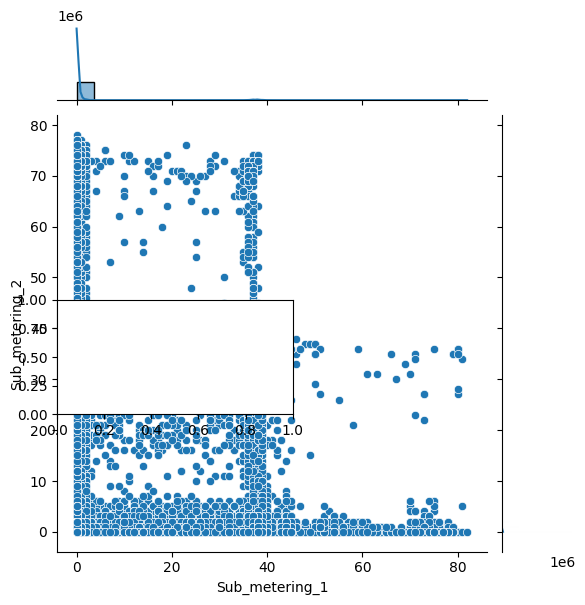

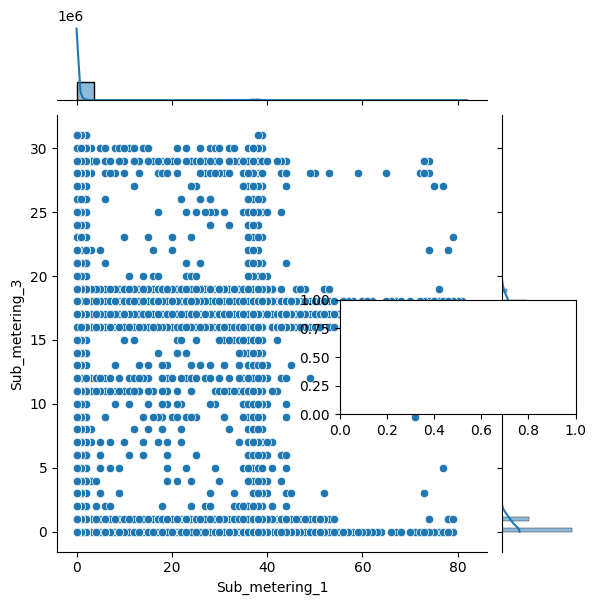

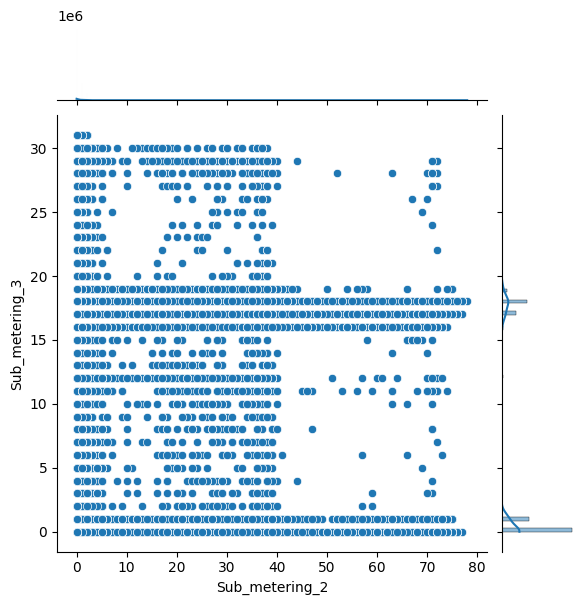

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

column_pairs = [
    ('Global_active_power', 'Global_reactive_power'),
    ('Global_active_power', 'Voltage'),
    ('Global_active_power', 'Global_intensity'),
    ('Sub_metering_1', 'Sub_metering_2'),
    ('Sub_metering_1', 'Sub_metering_3'),
    ('Sub_metering_2', 'Sub_metering_3')
]

num_pairs = len(column_pairs)
plt.figure(figsize=(18, 16))

for i, (col1, col2) in enumerate(column_pairs):
    plt.subplot(4, 2, i + 1)
    sns.jointplot(x=col1, y=col2, data=newdf, kind='scatter', marginal_kws={'kde': True})

plt.show()

In [44]:
def visualize_yearly(data, feat_name):
    fig, axis = plt.subplots(4, 1, figsize=(30, 20))
    for i, d in enumerate(zip(axis, list(data[feat_name].groupby(data.index.year)))):
        d[0].plot(pd.DataFrame(d[1][1]), label=d[1][0])
        d[0].legend(loc='upper right')

    fig.text(0.40, 0.9, 'Year-Wise Analysis : %s ' % feat_name, va='center', fontdict={'fontsize': 25})
    plt.show()

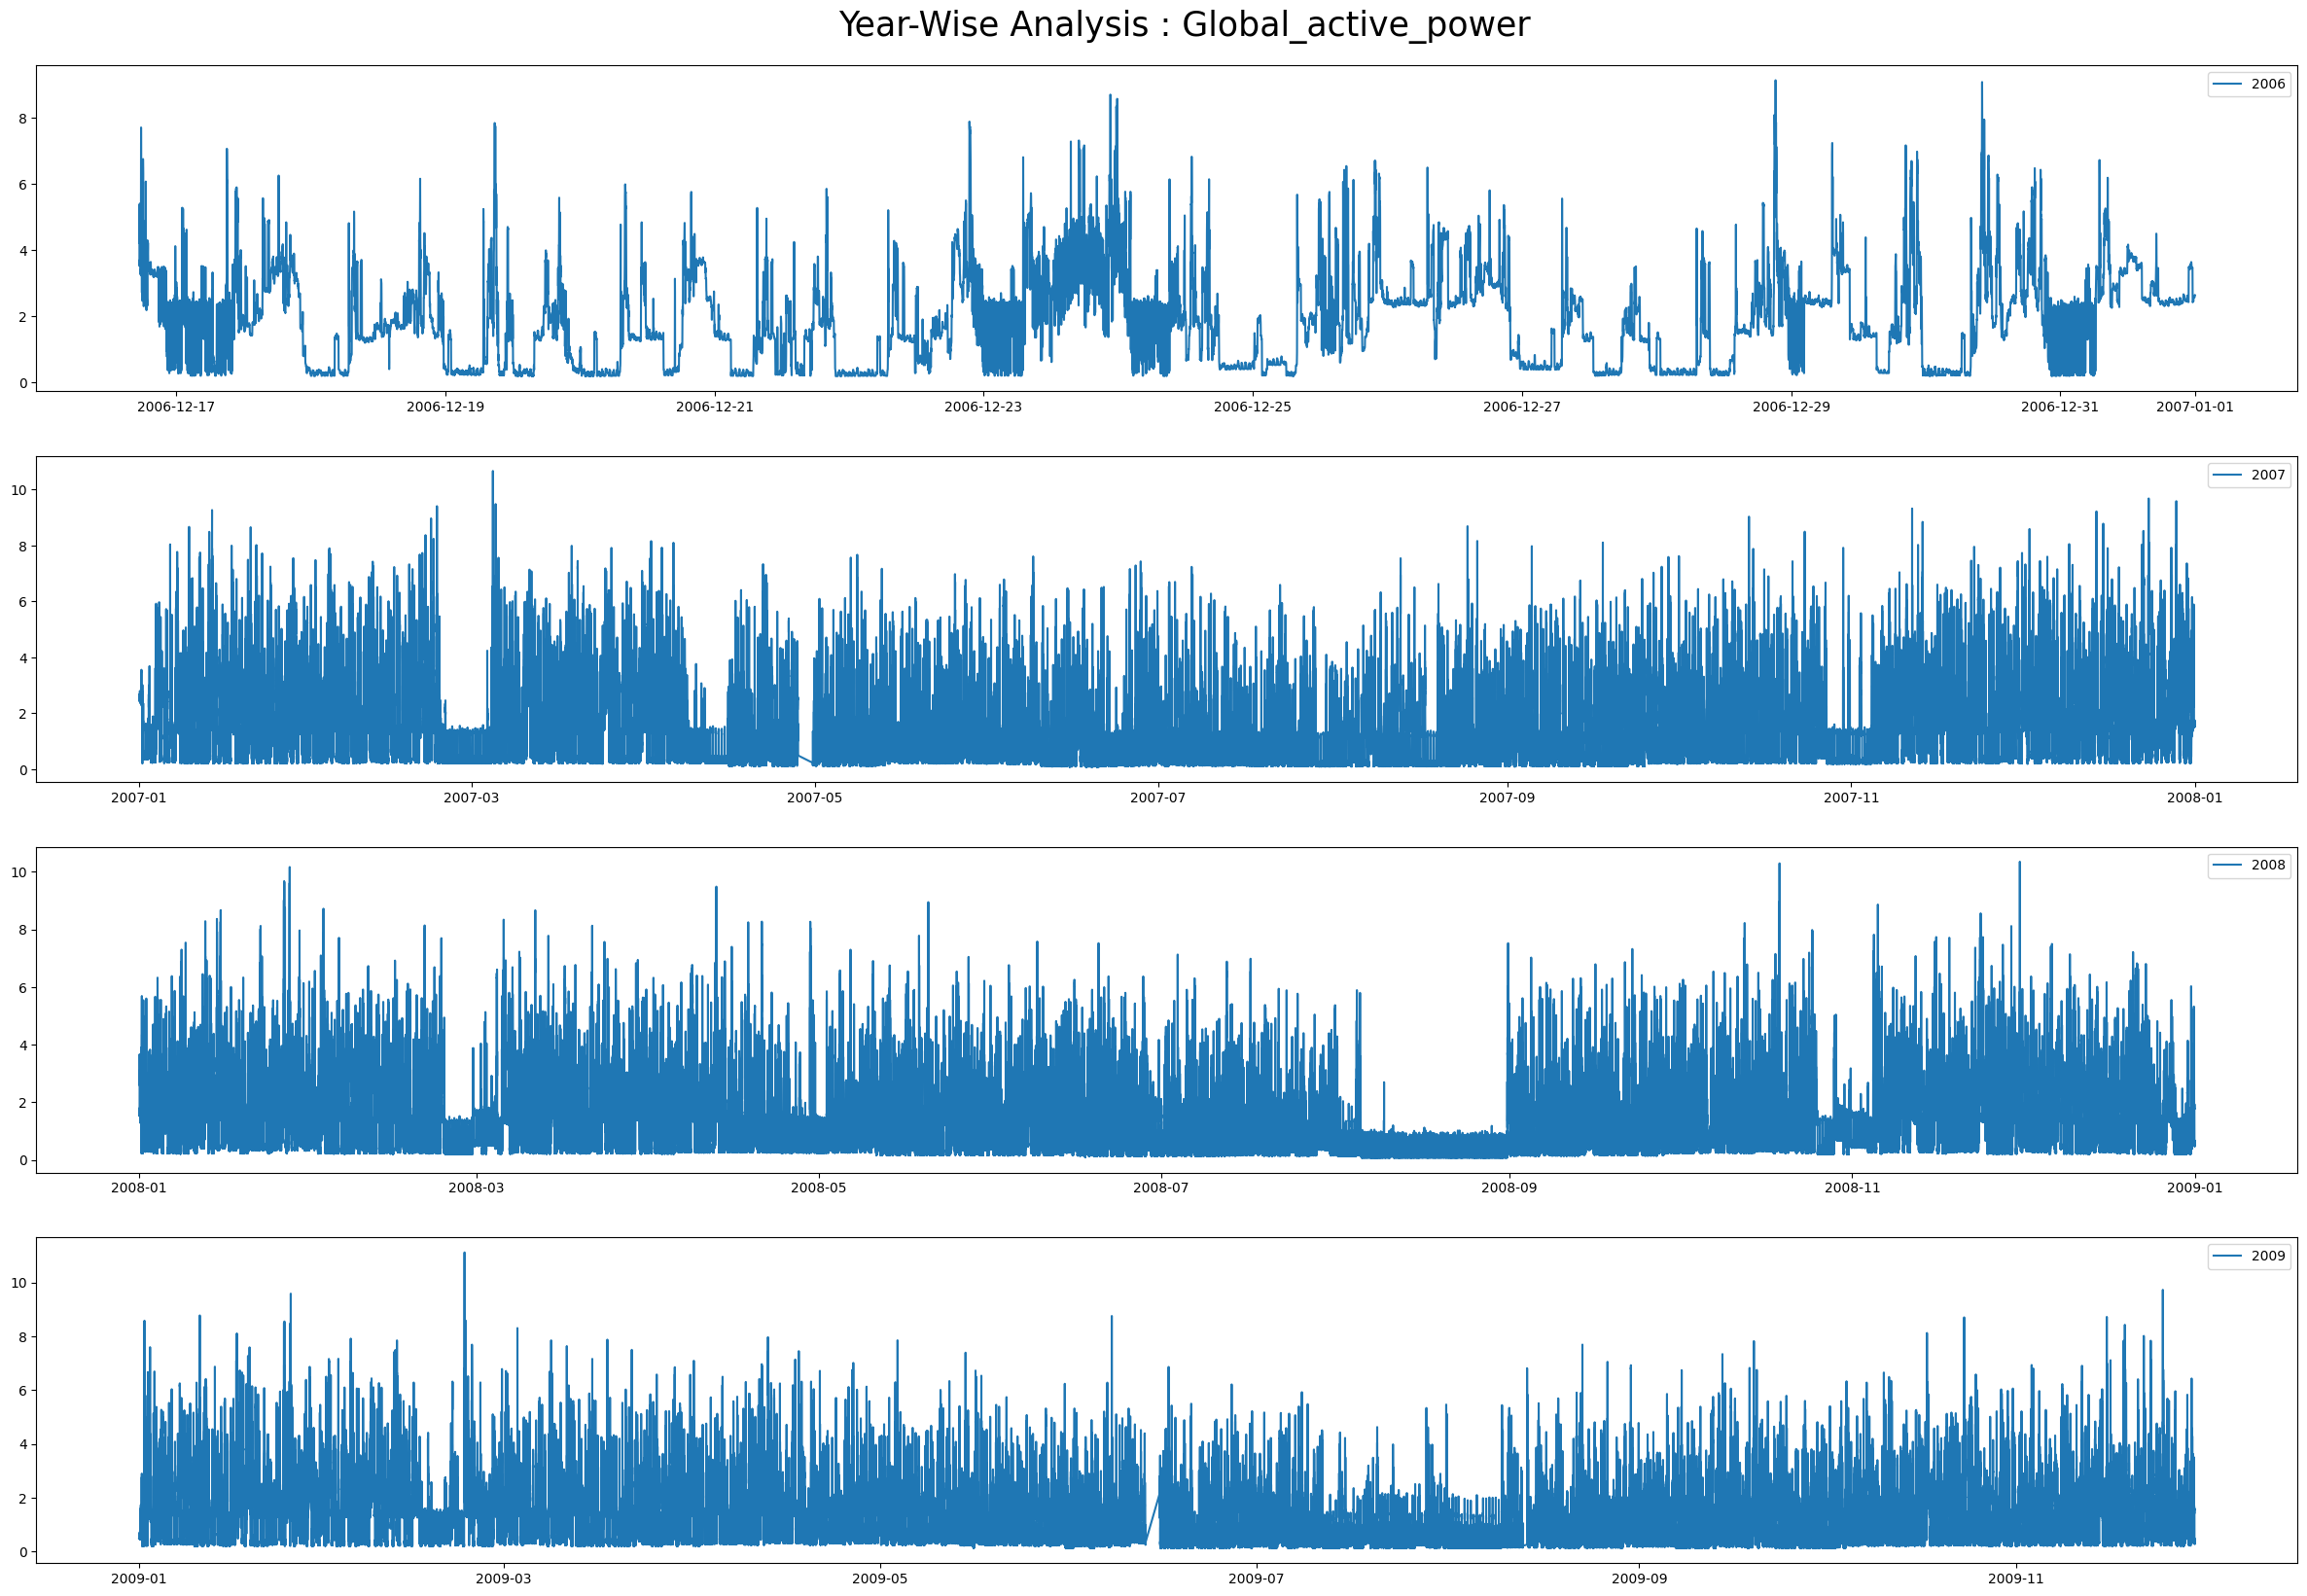

In [61]:
visualize_yearly(data=newdf, feat_name='Global_active_power')

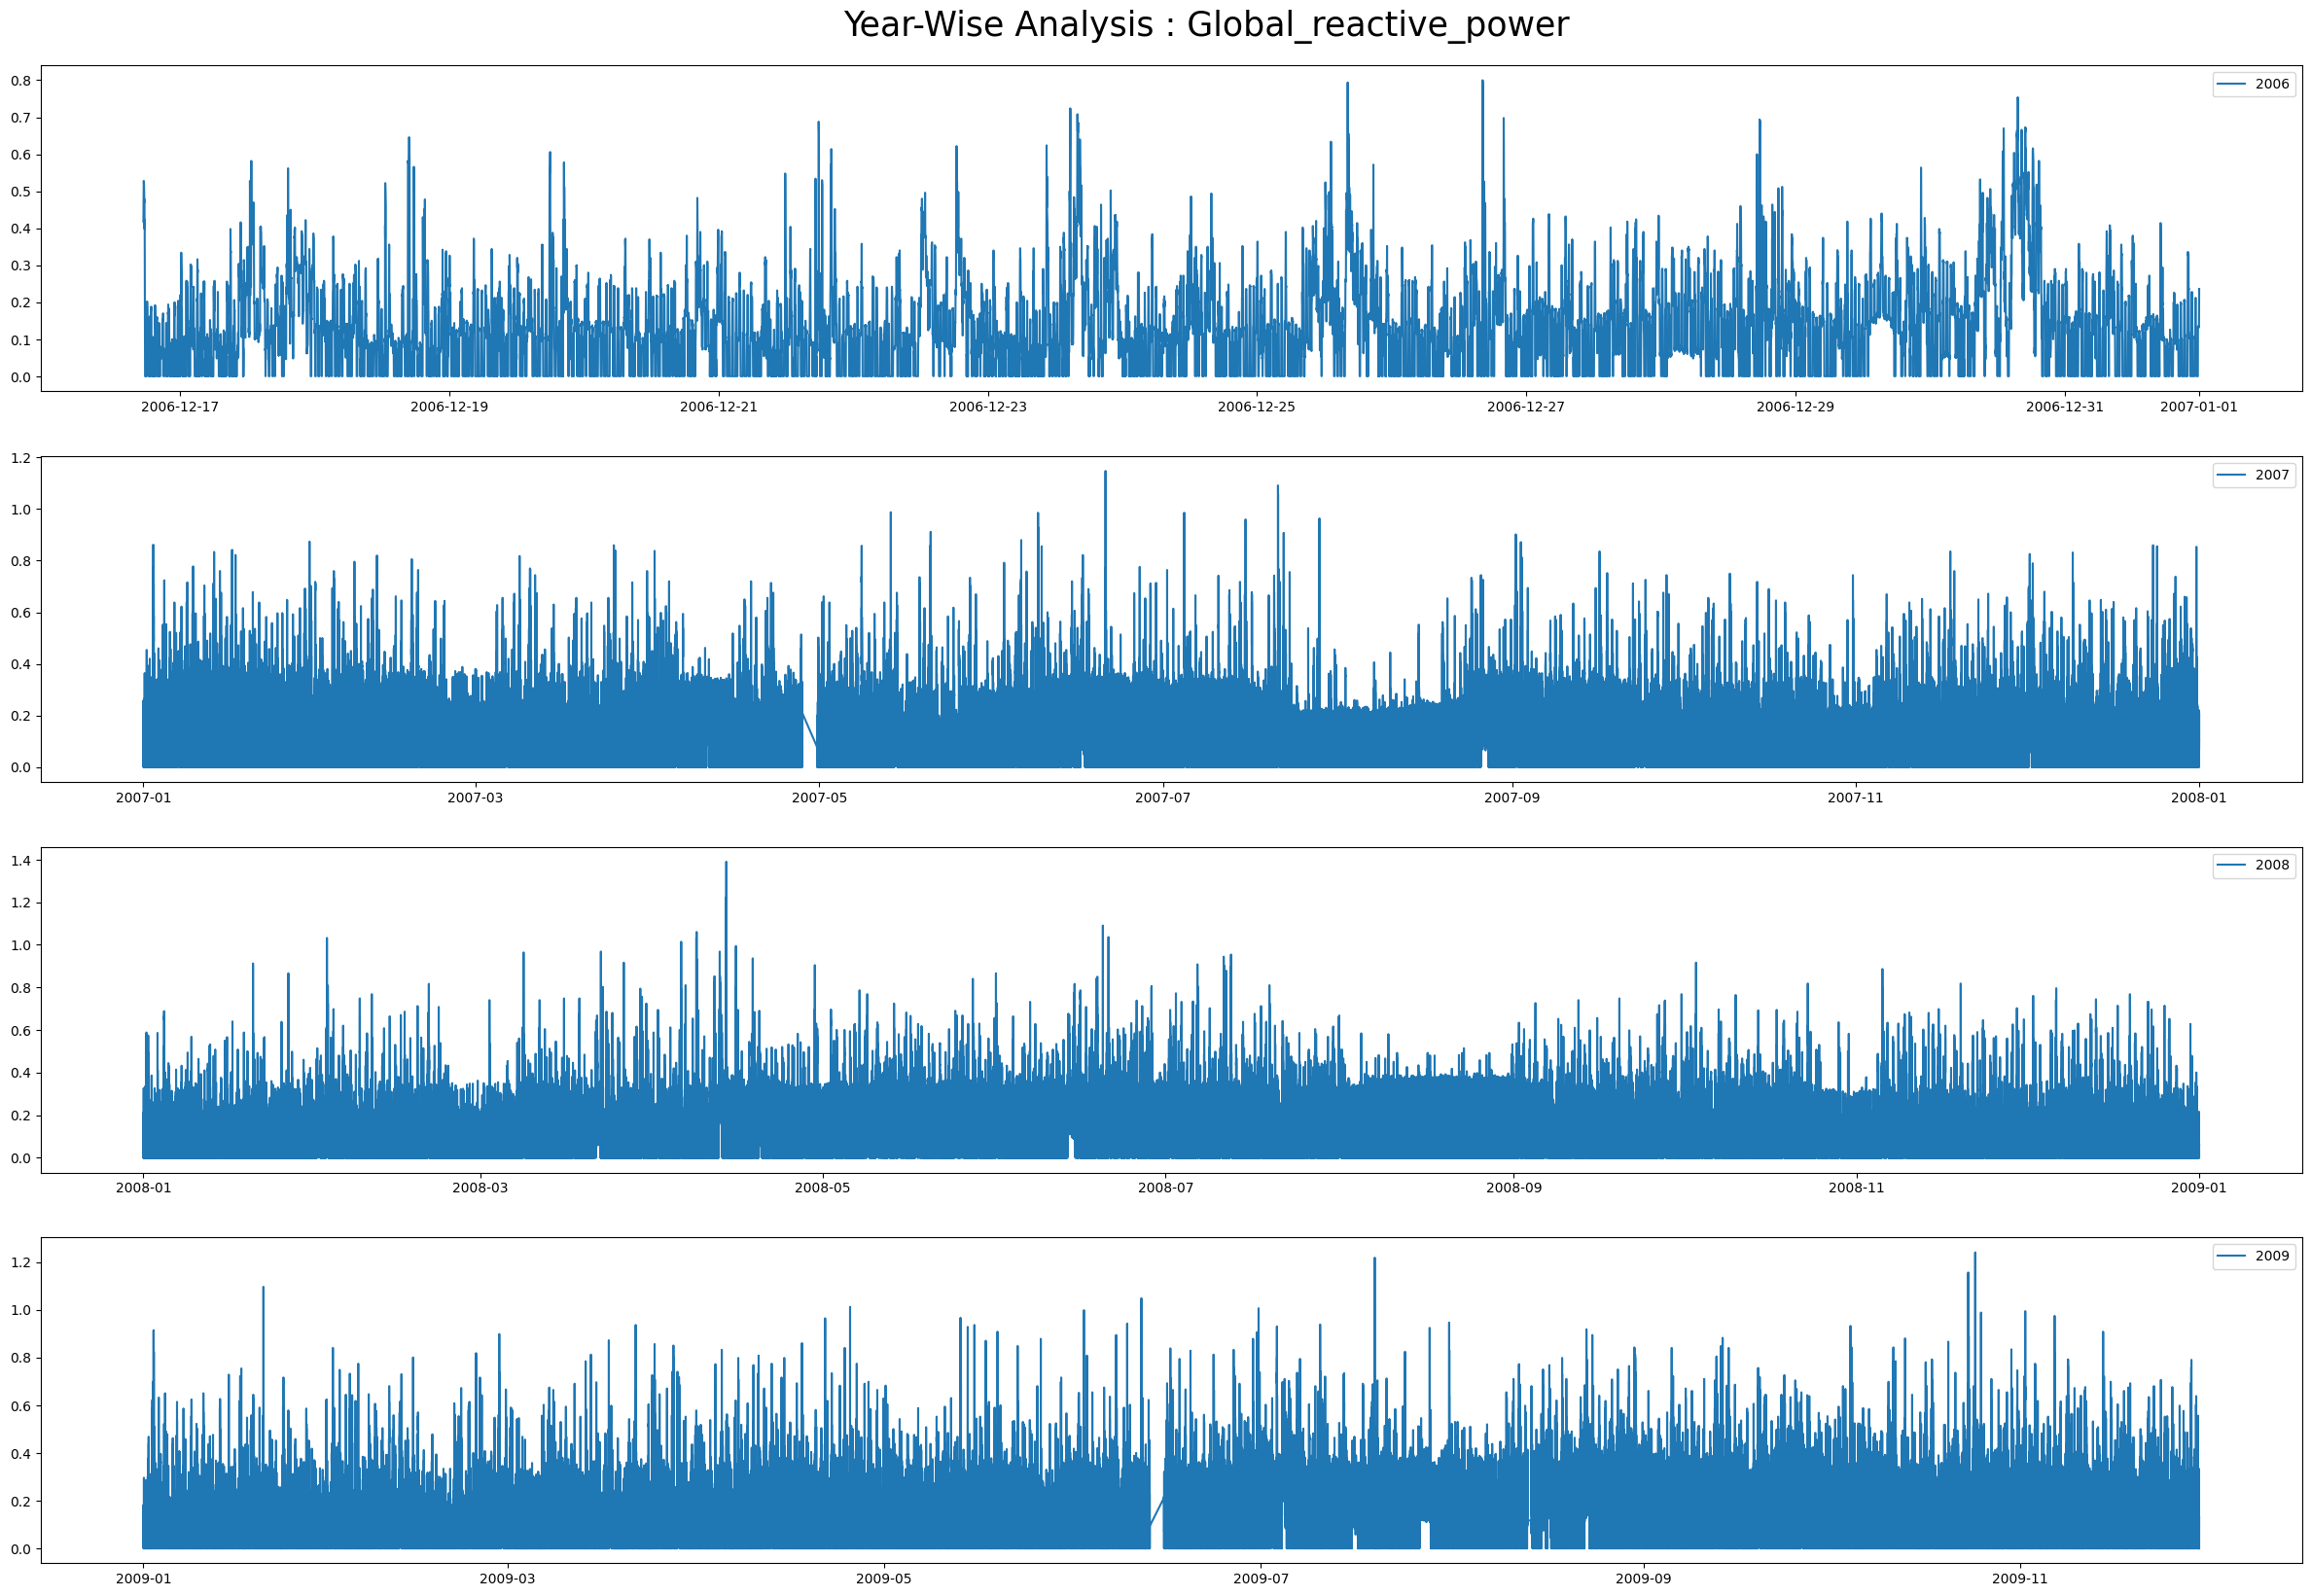

In [62]:
visualize_yearly(data=newdf, feat_name='Global_reactive_power')

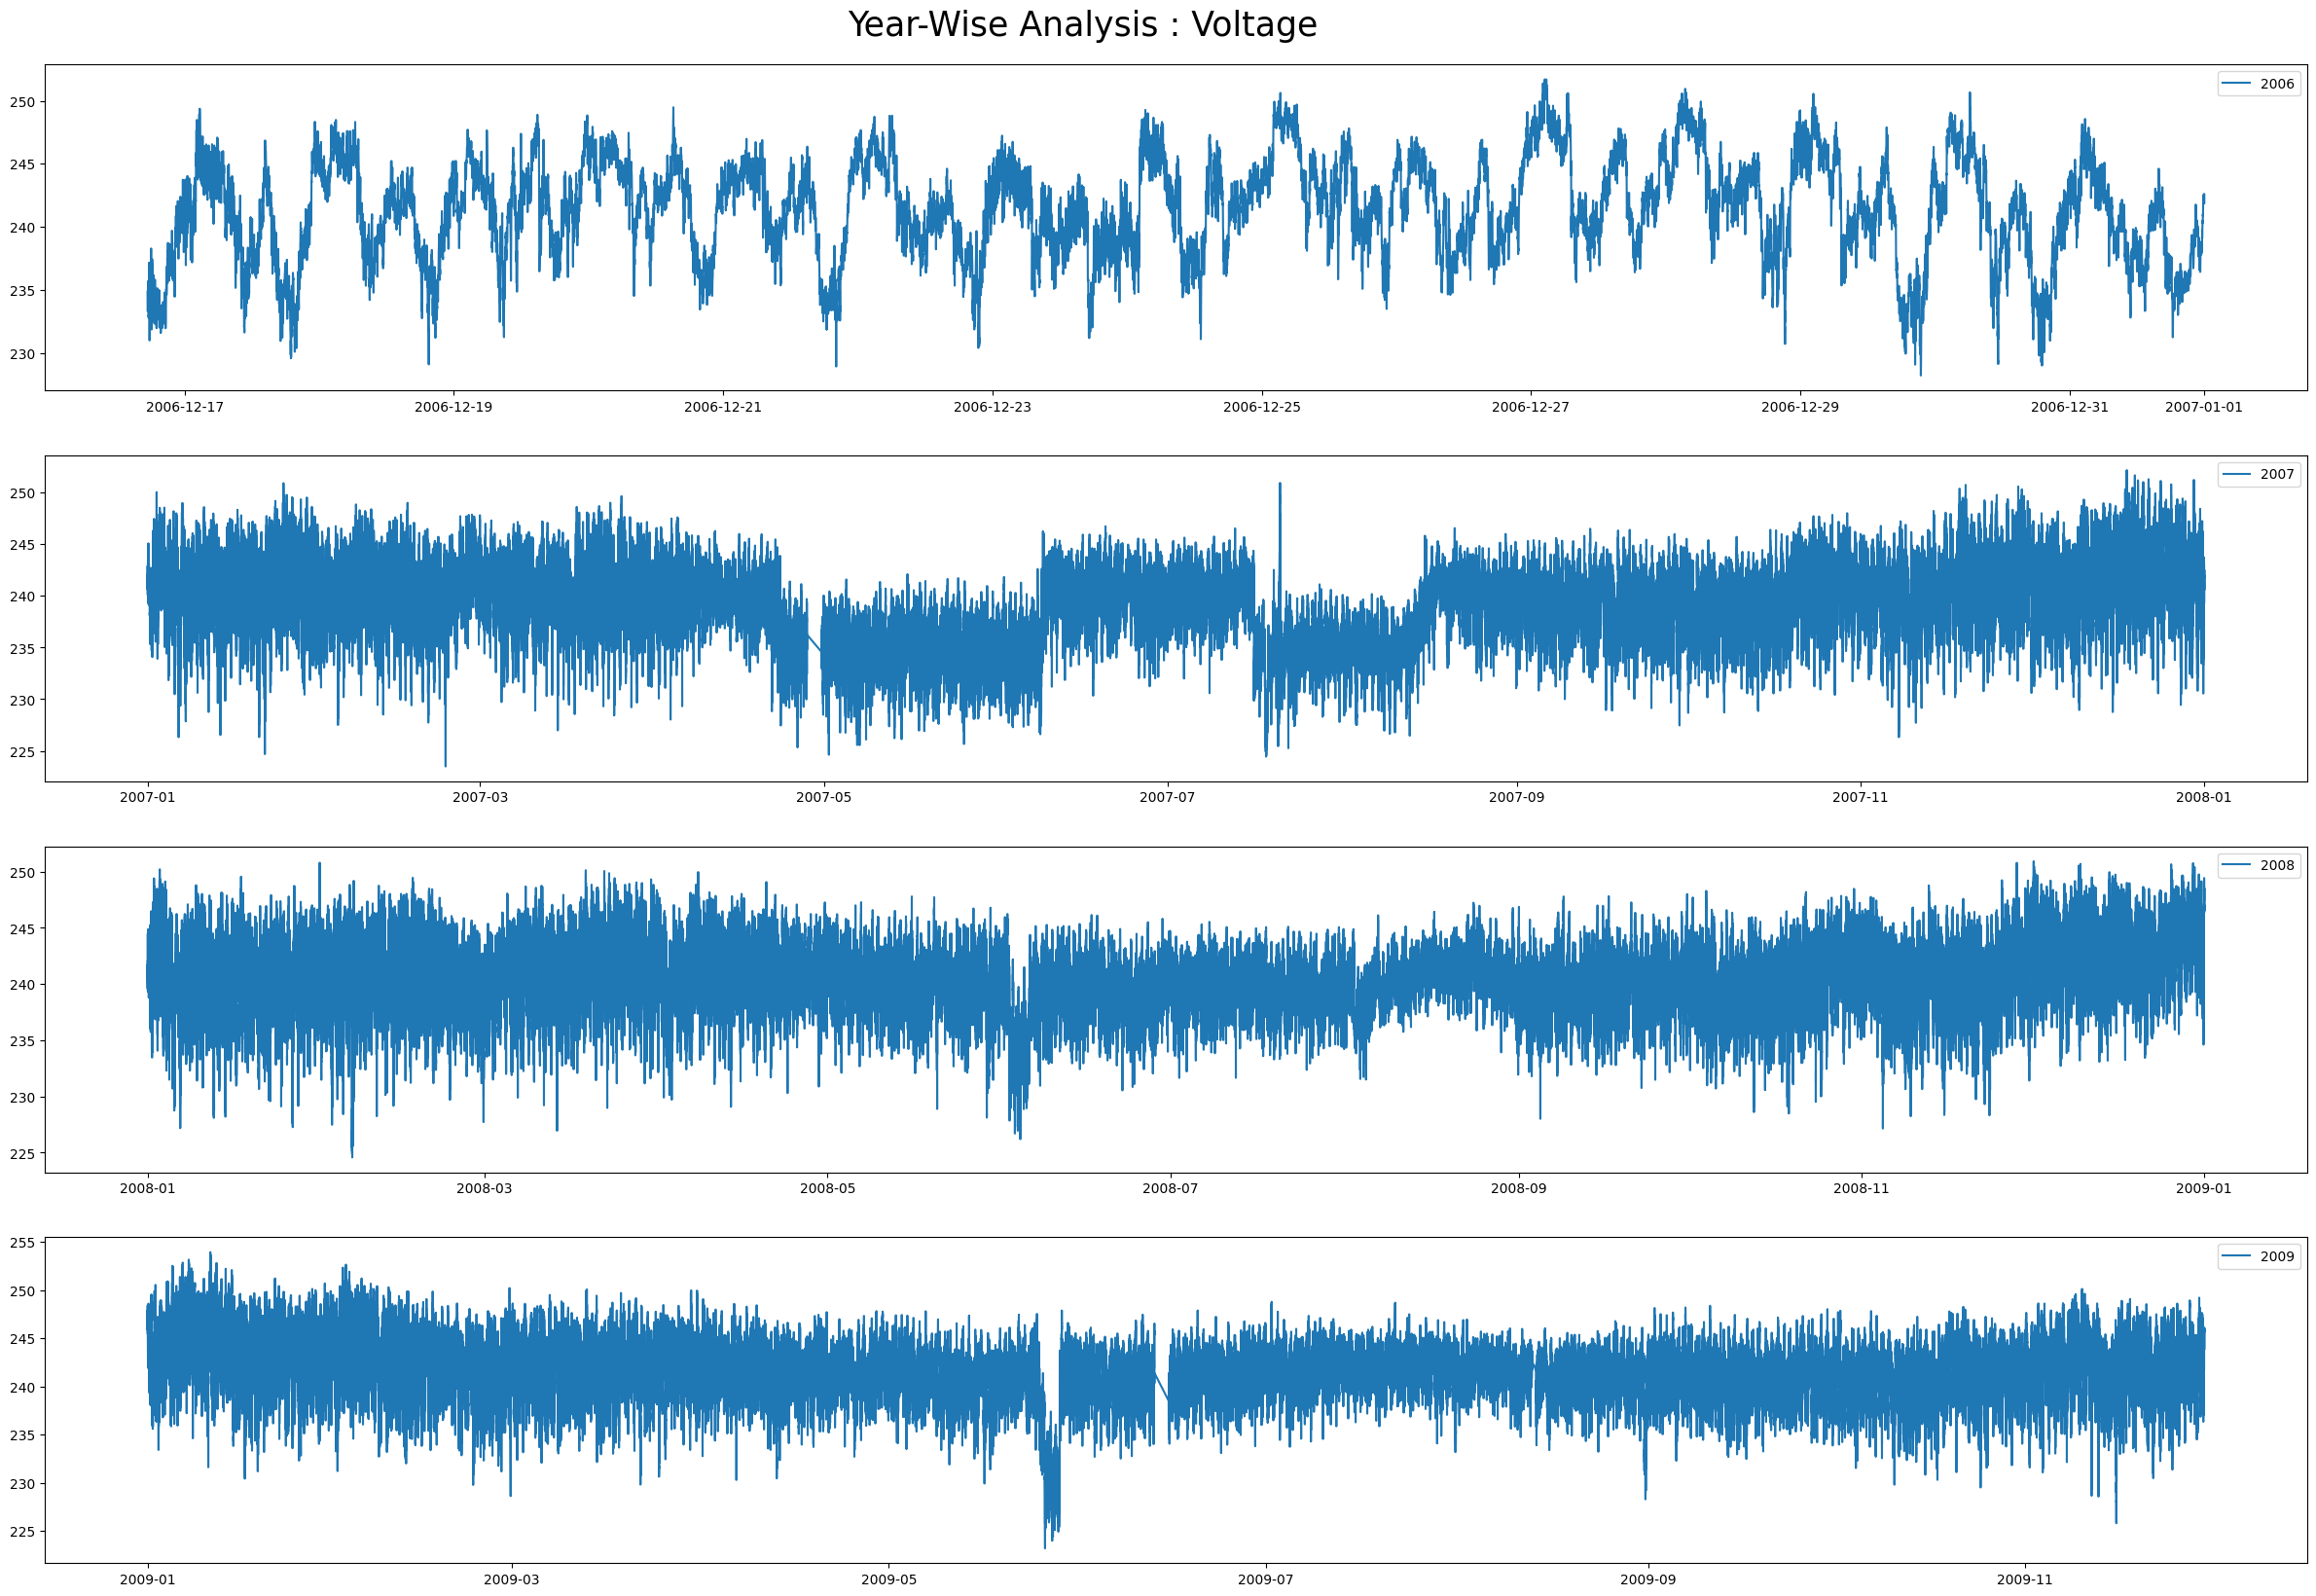

In [63]:
visualize_yearly(data=newdf, feat_name='Voltage')

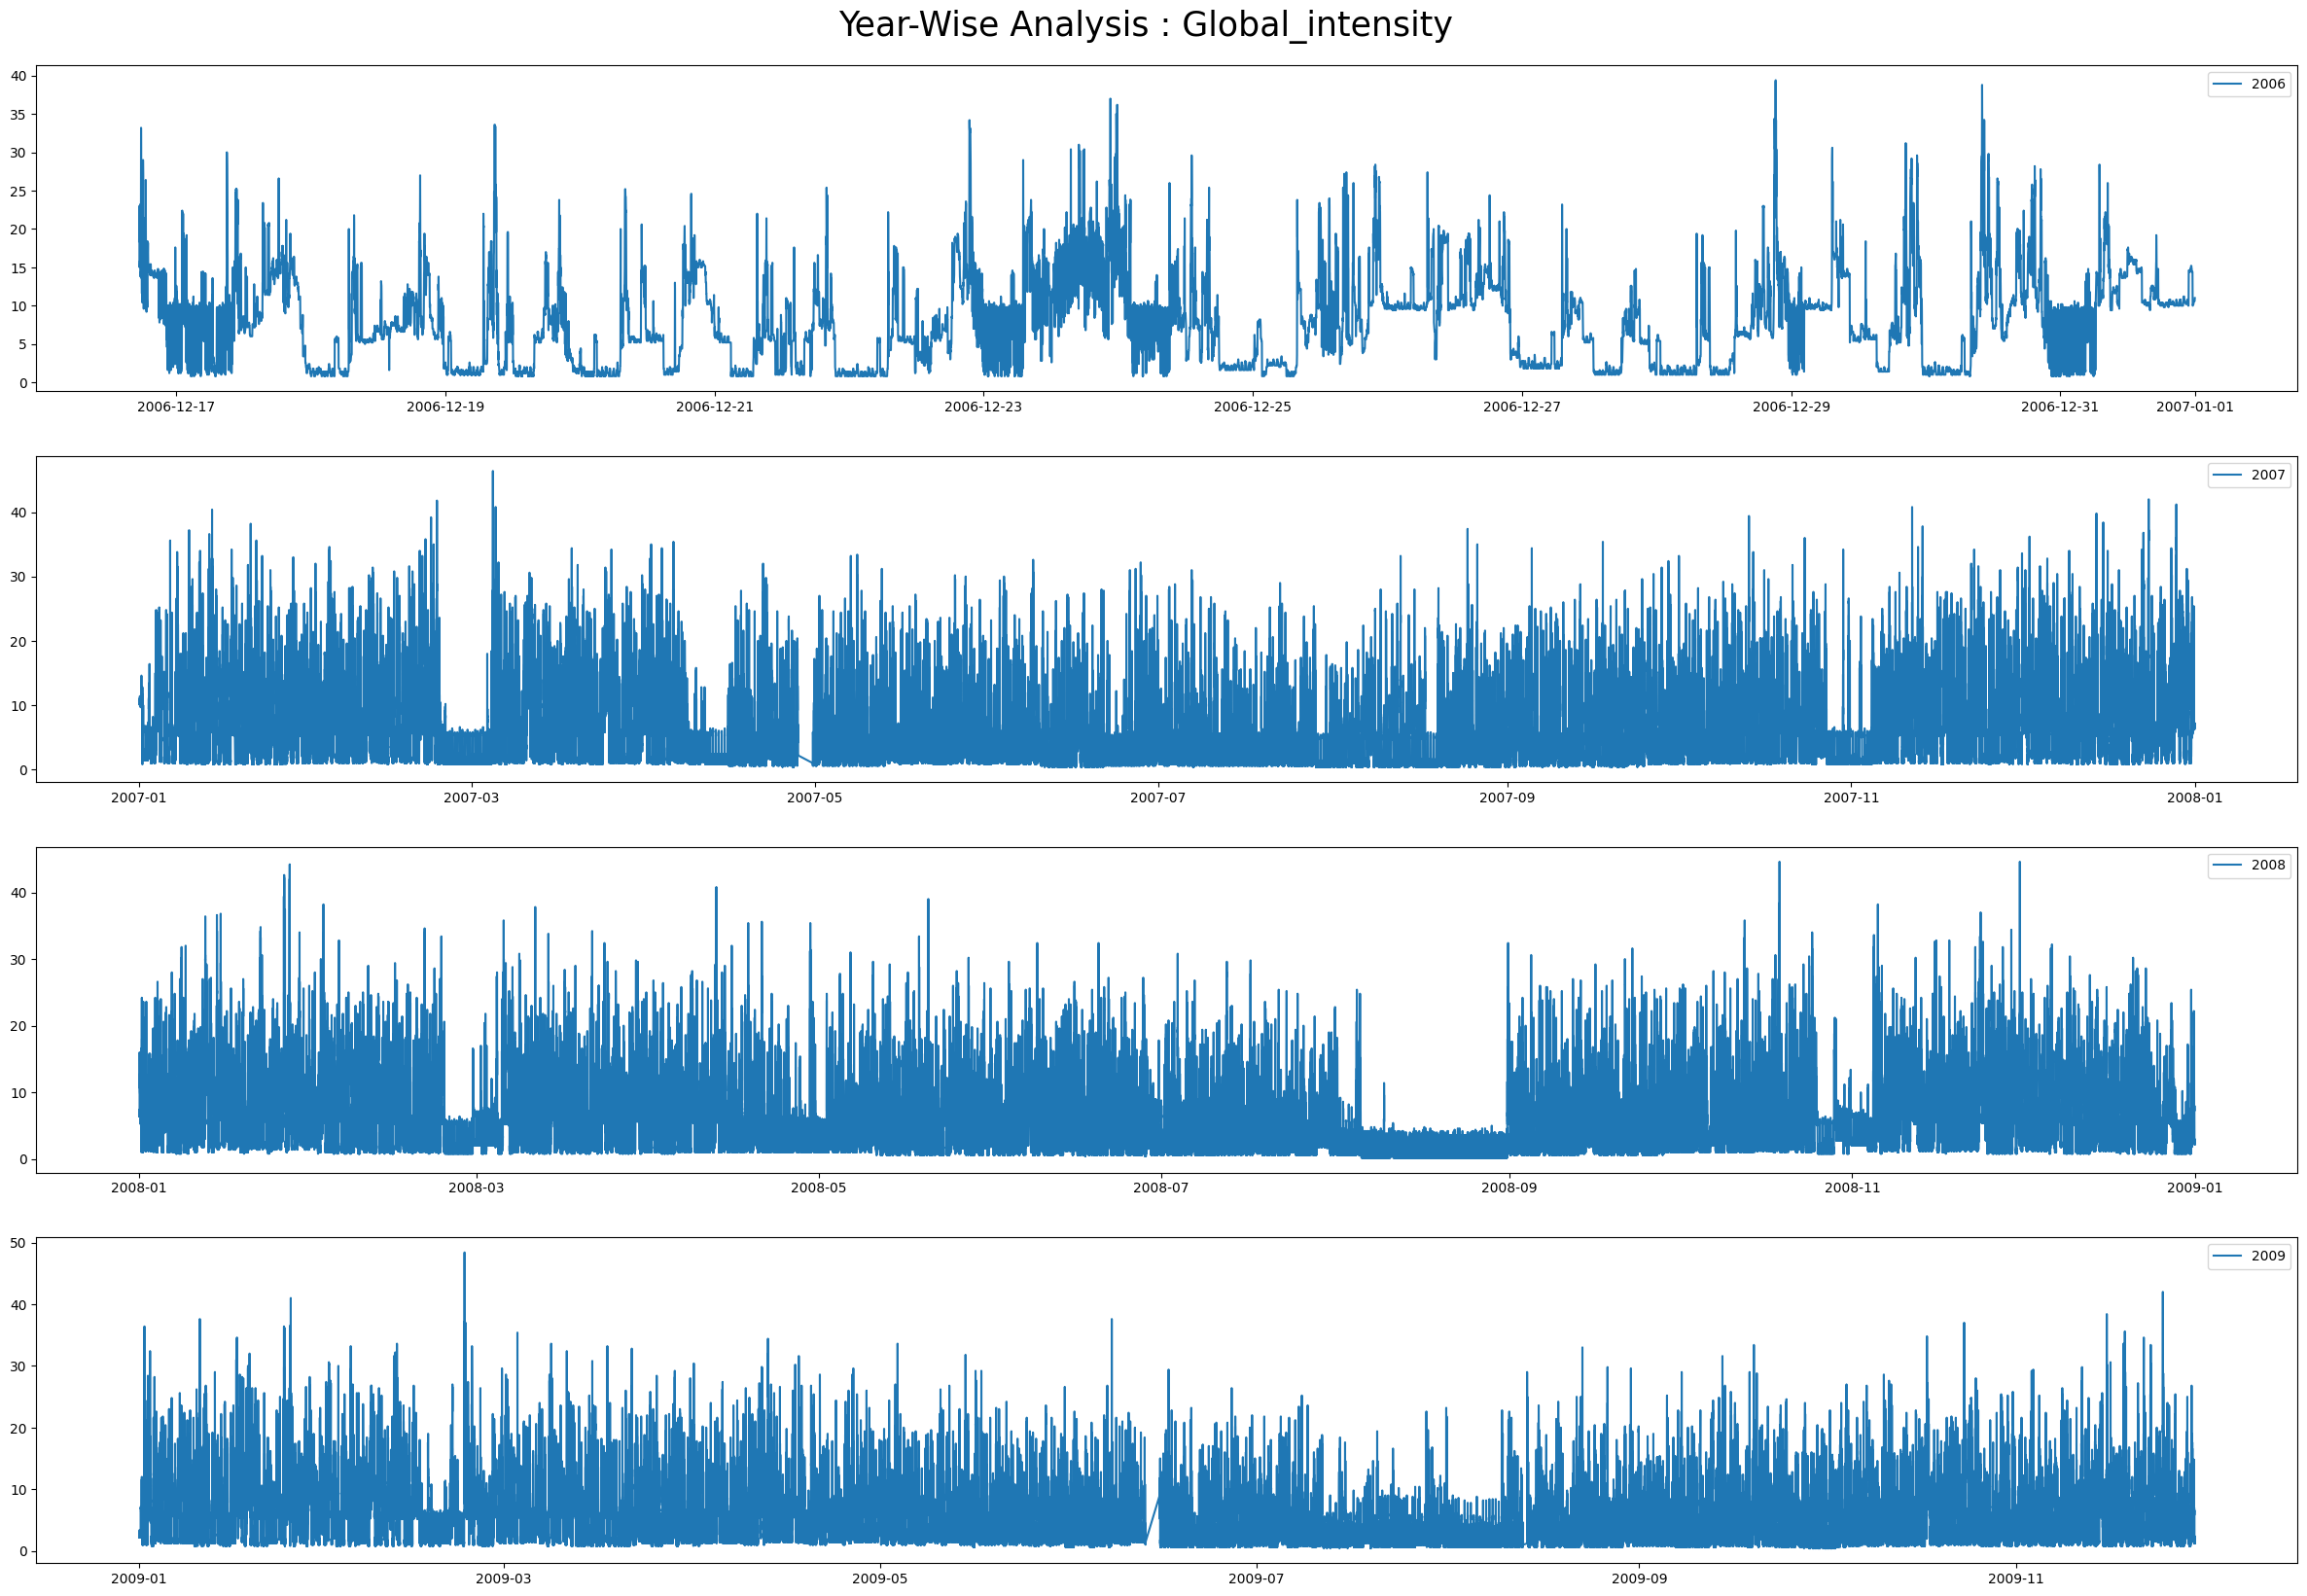

In [64]:
visualize_yearly(data=newdf, feat_name='Global_intensity')

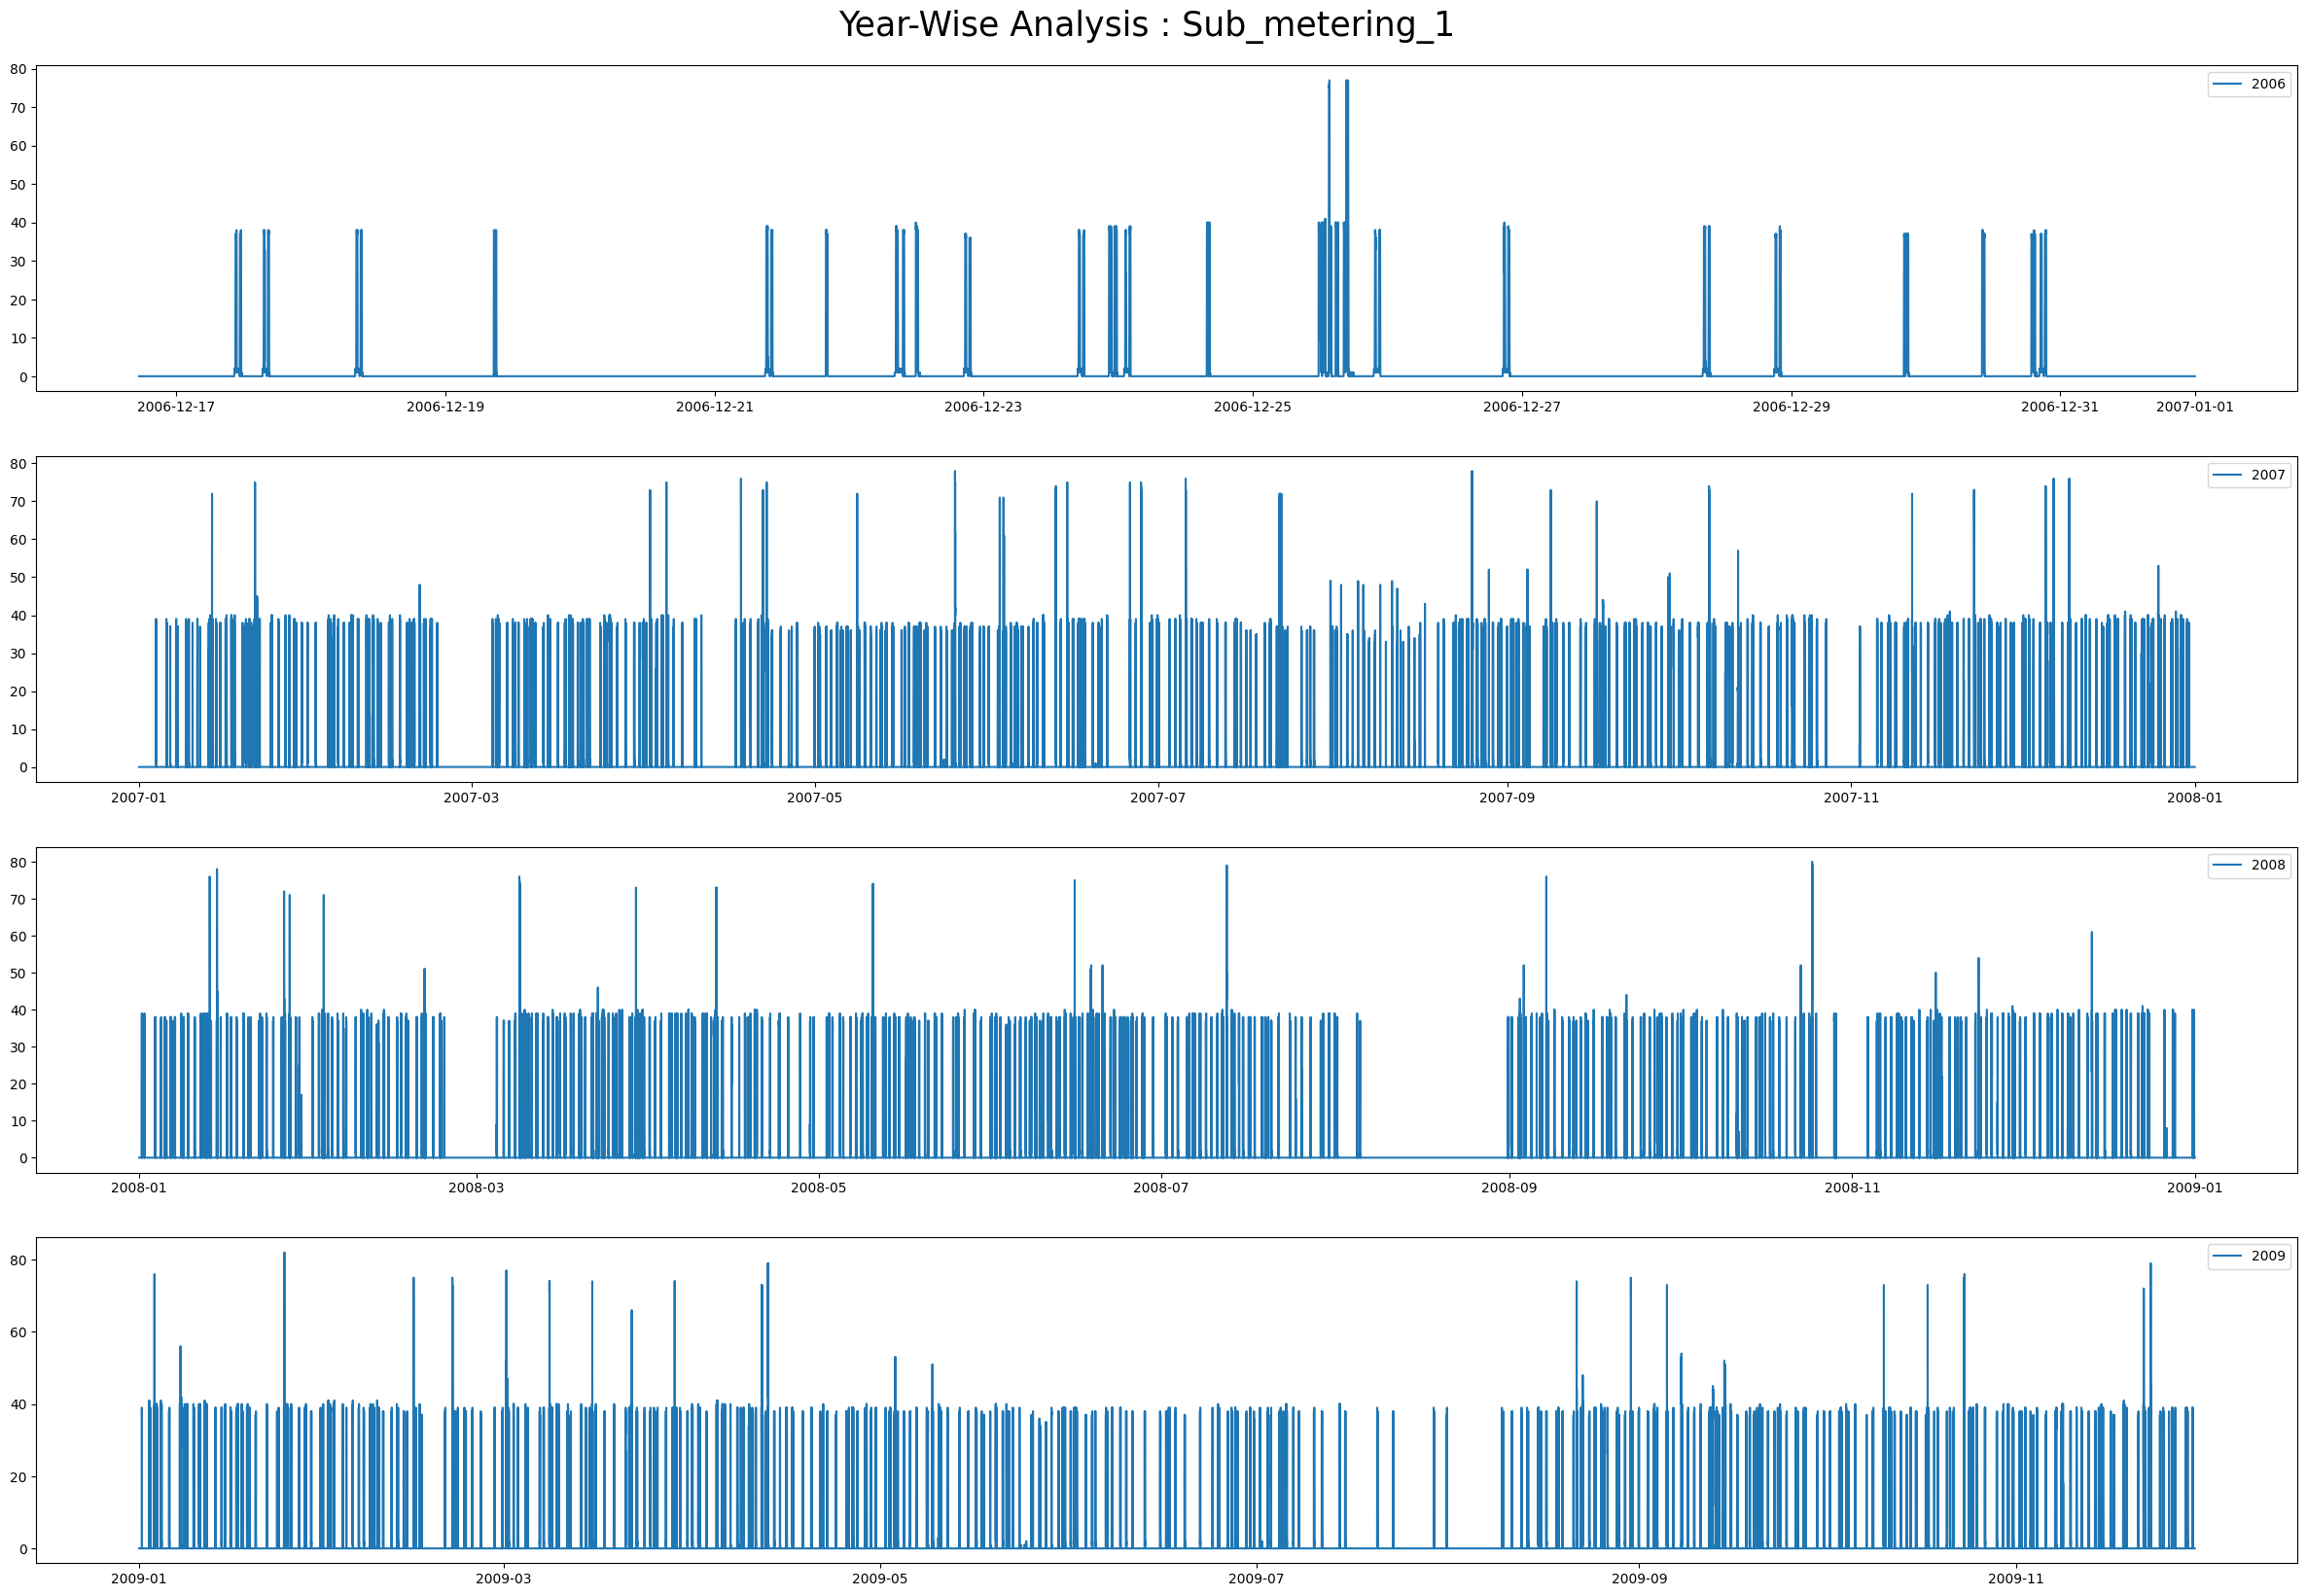

In [65]:
visualize_yearly(data=newdf, feat_name='Sub_metering_1')

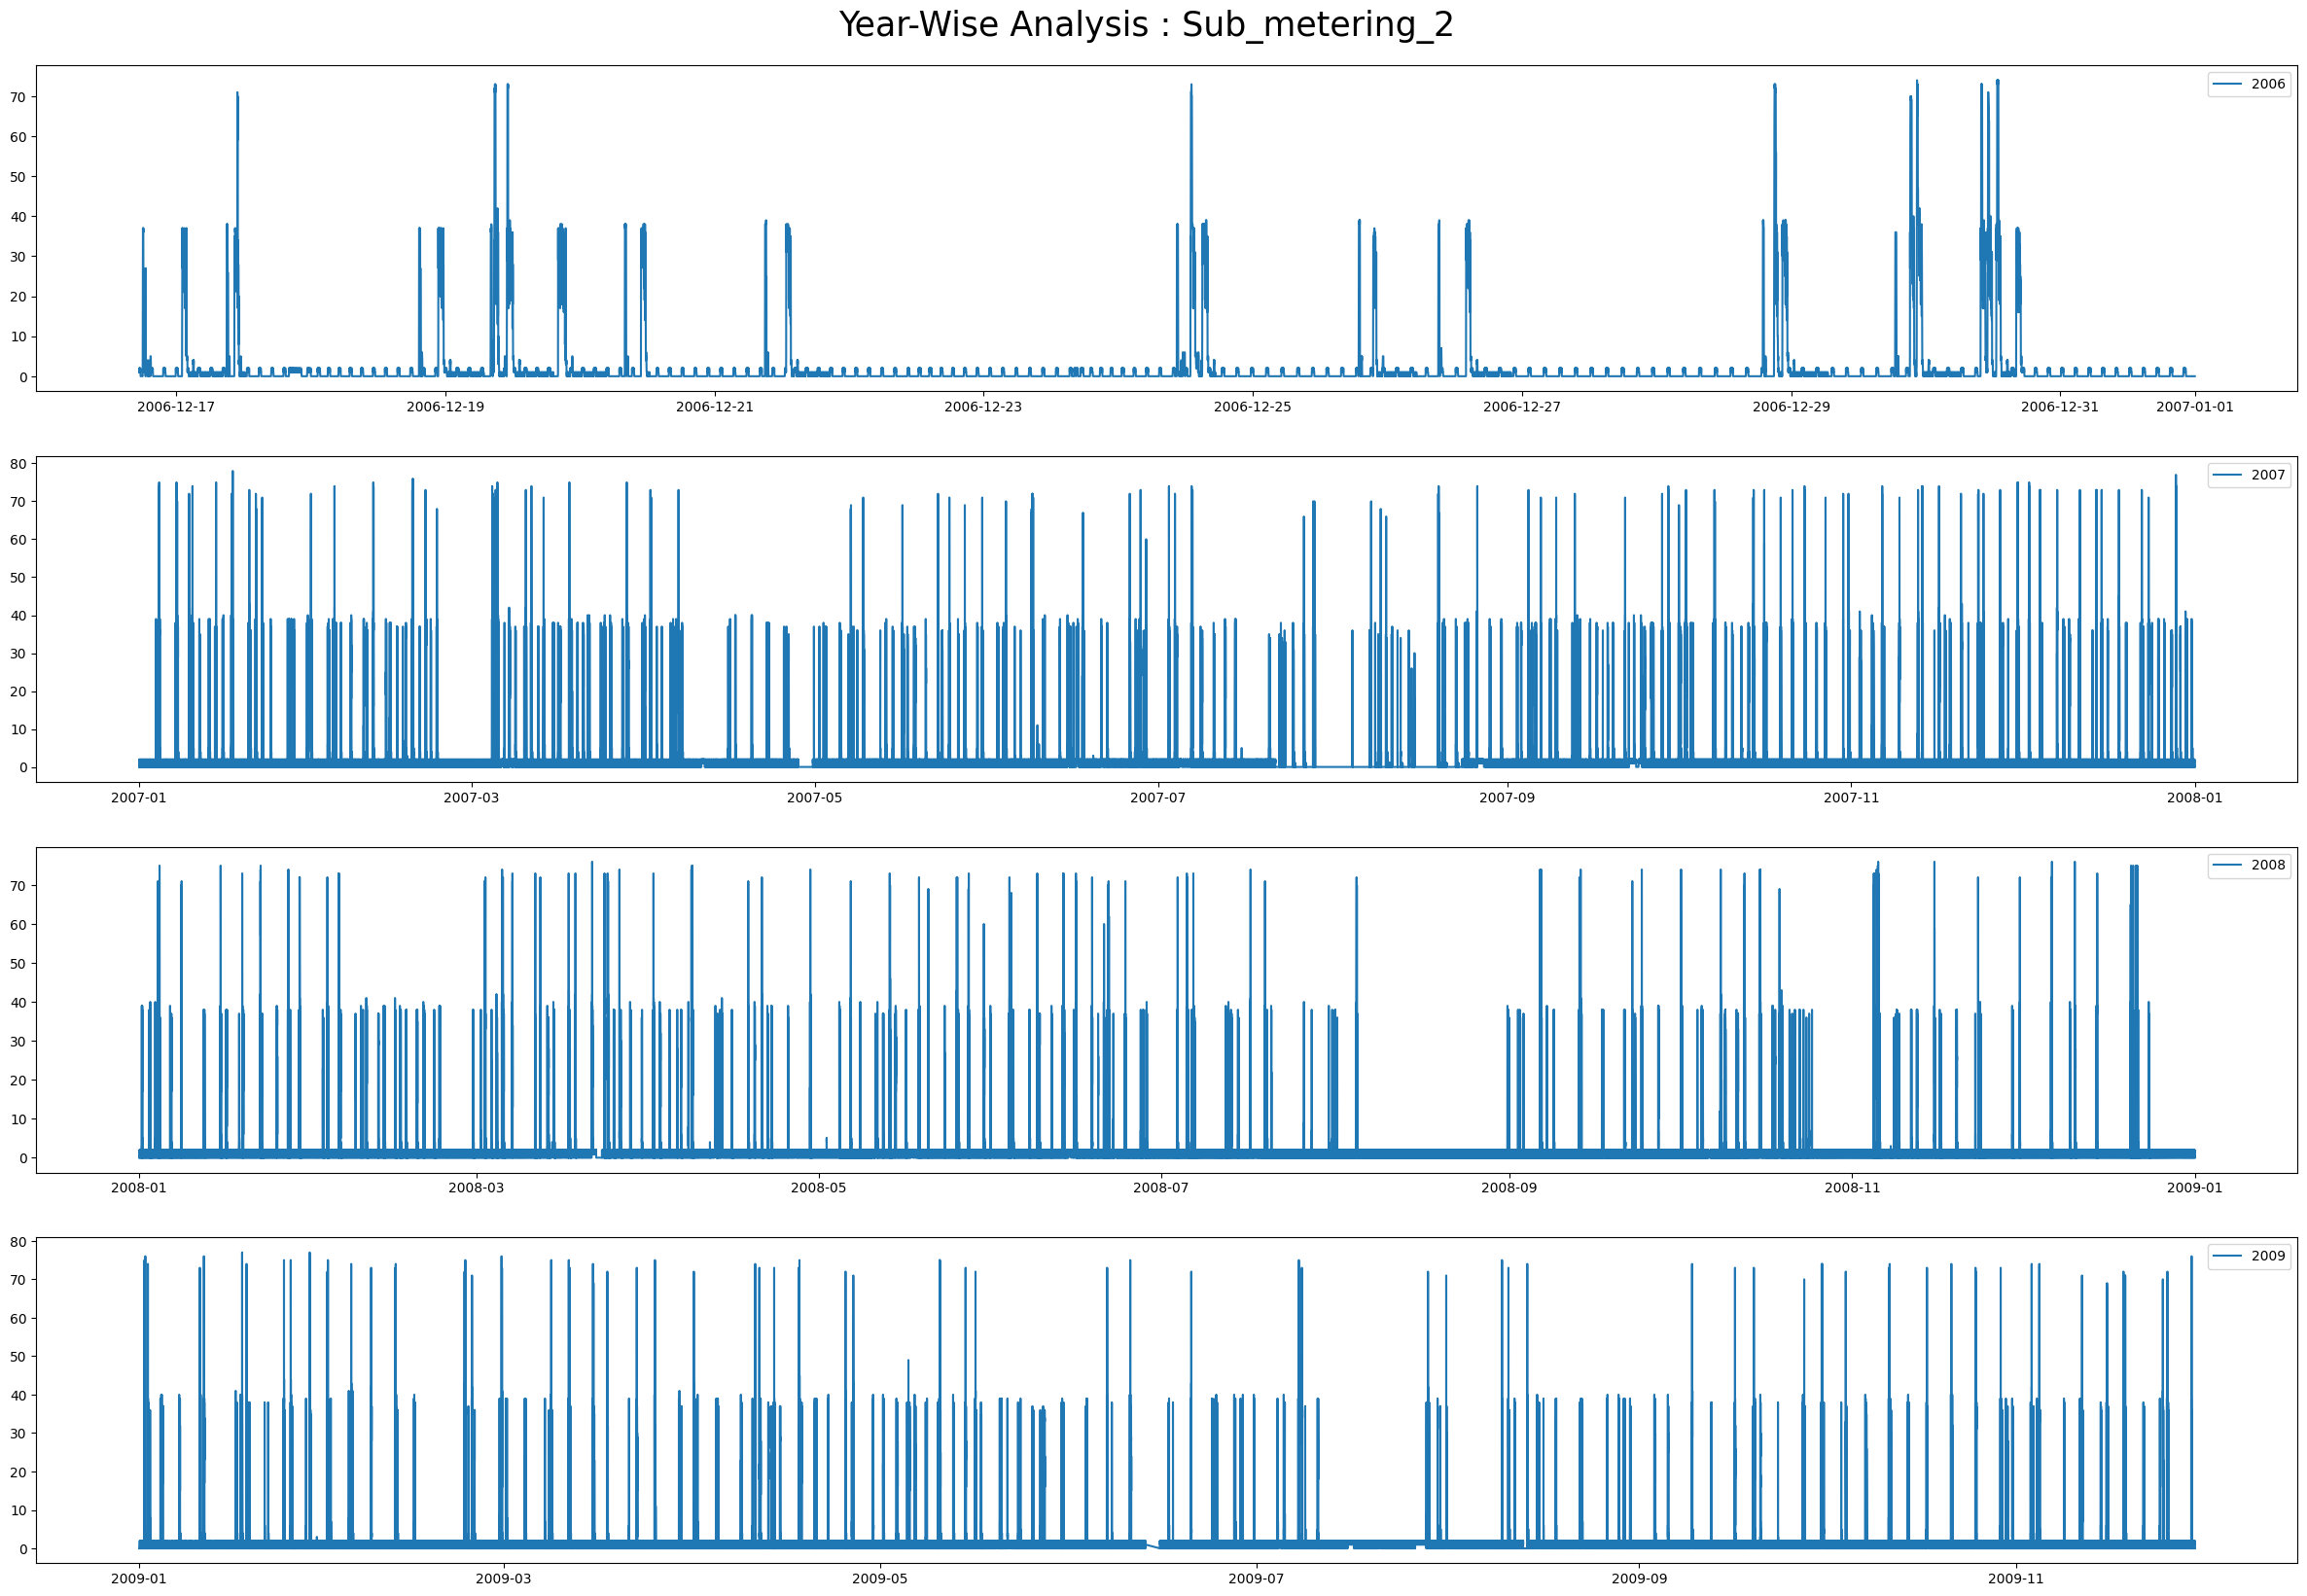

In [66]:
visualize_yearly(data=newdf, feat_name='Sub_metering_2')

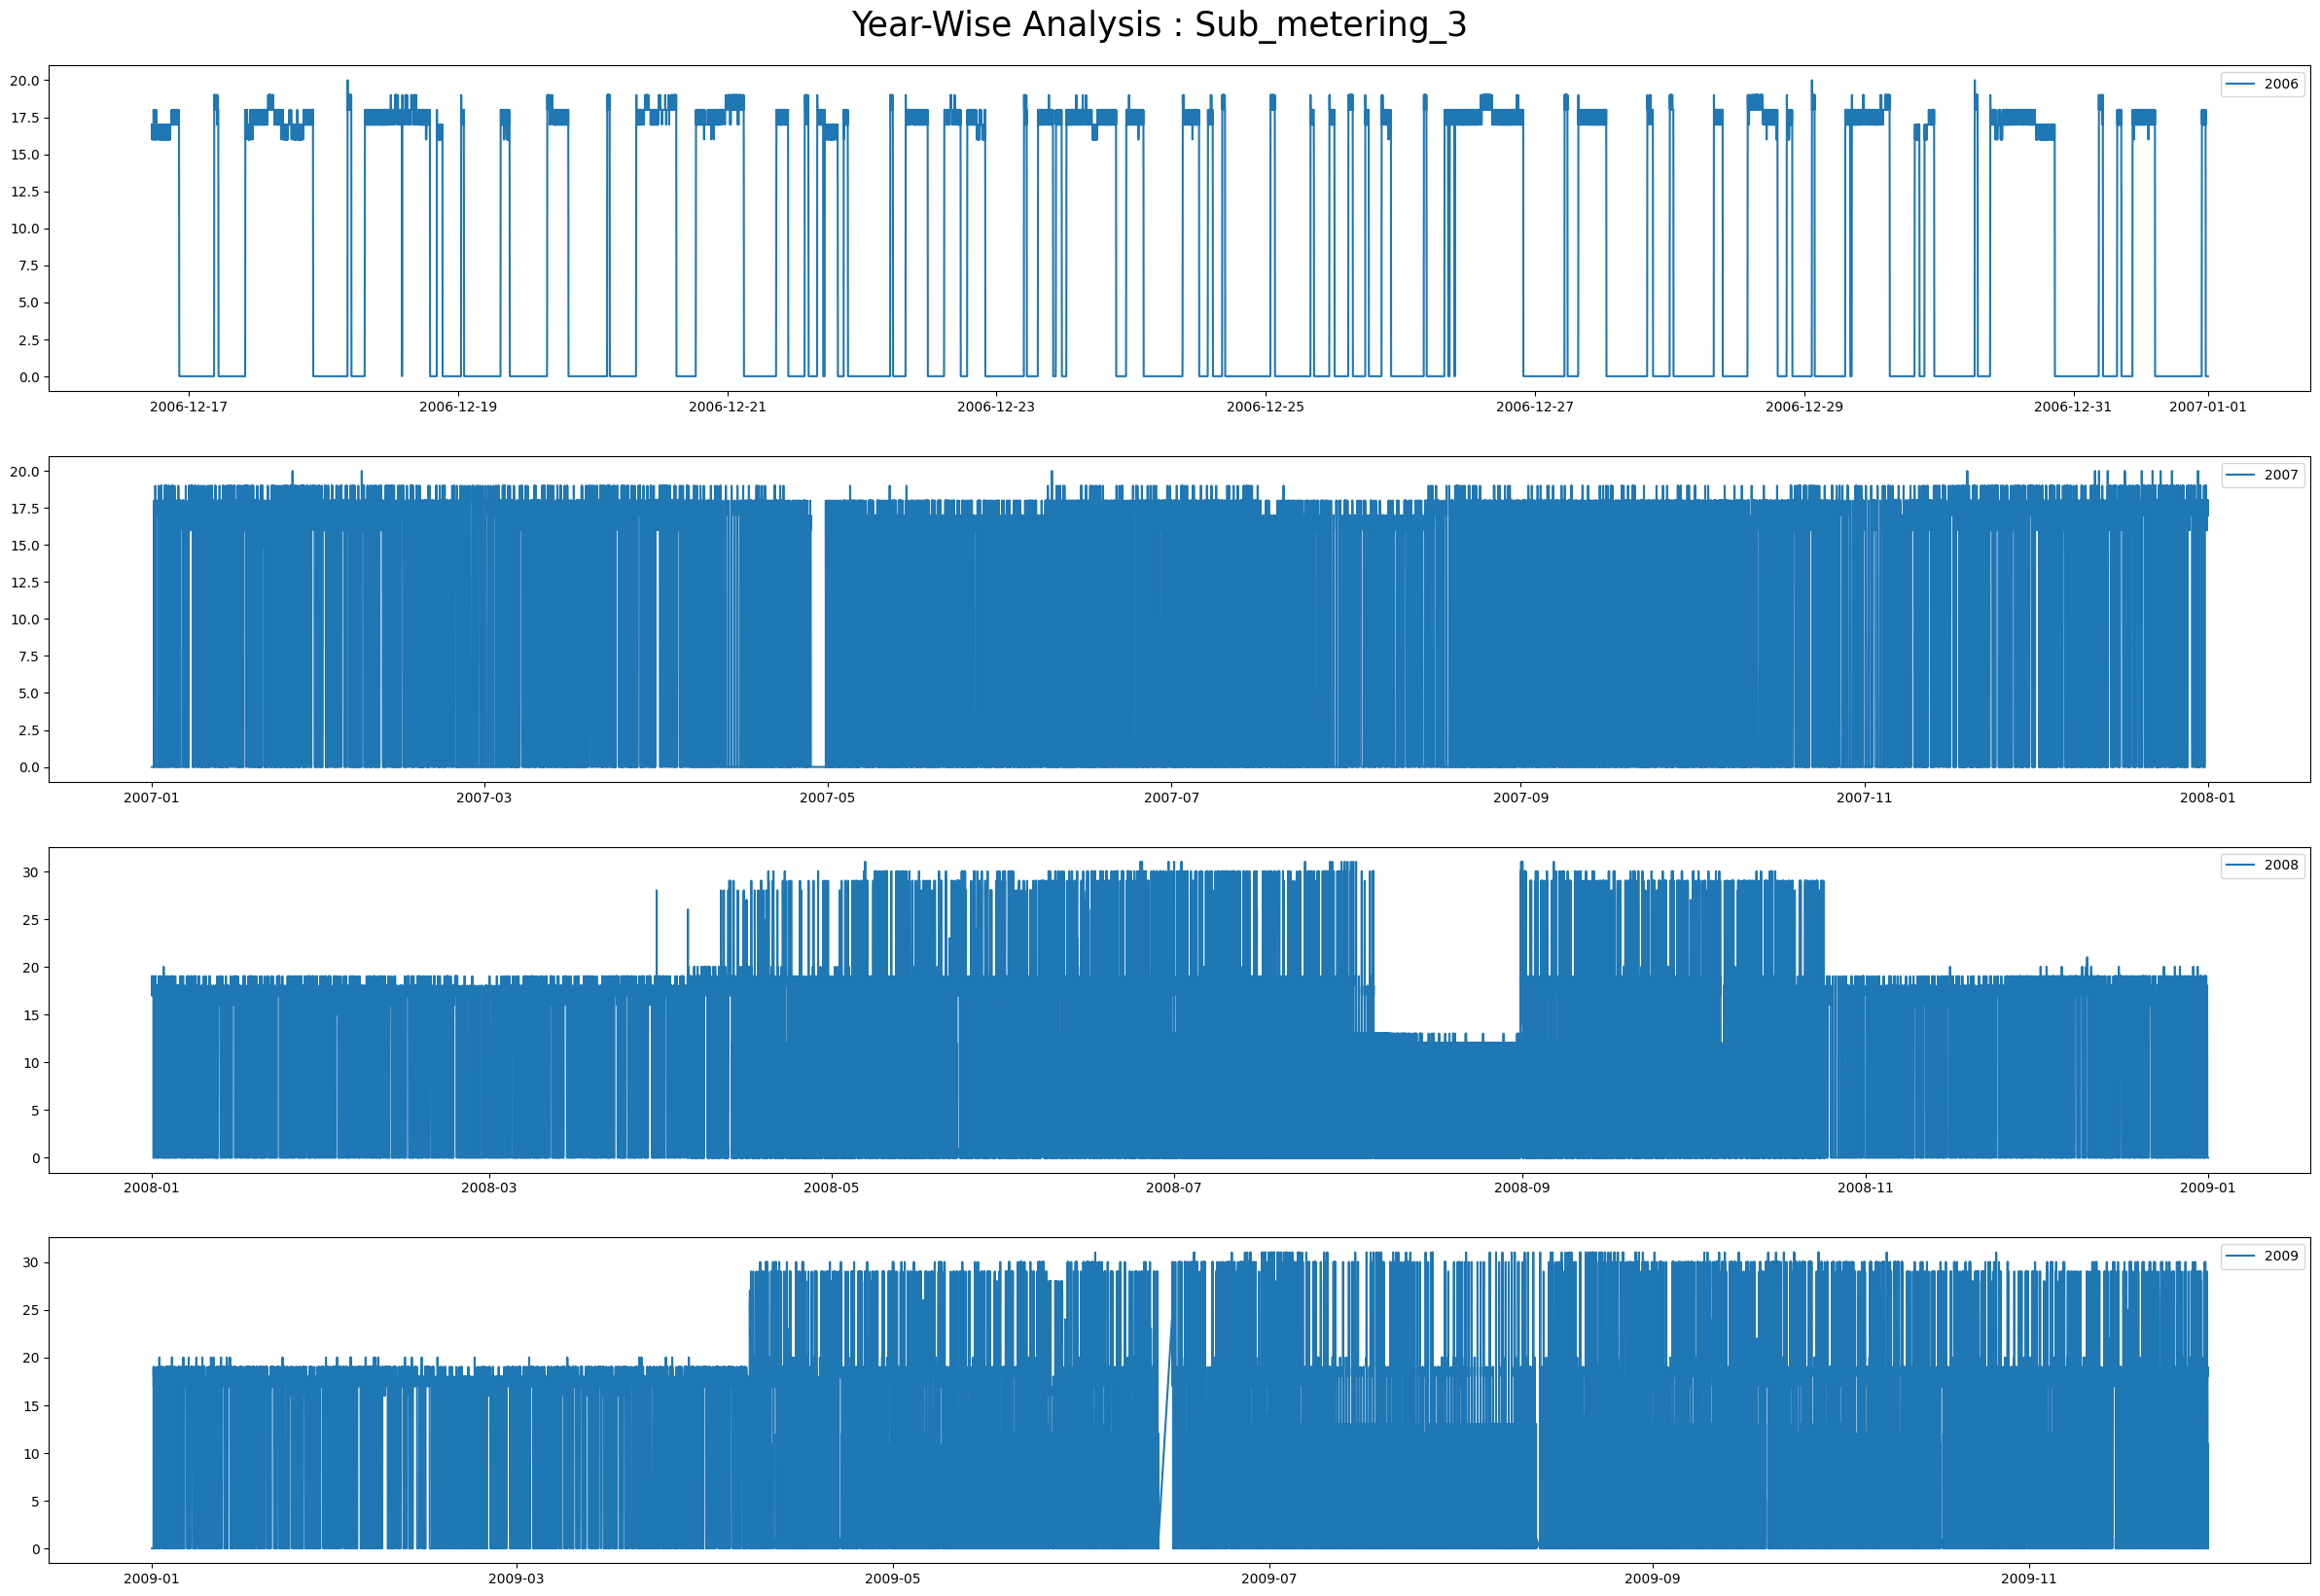

In [67]:
visualize_yearly(data=newdf, feat_name='Sub_metering_3')